<b>Case 4 - Millennium BCP
<br>Group H

<br>| Ana Teresa Maia | r20201562 |
<br>| Henrique Falcão | r20201519 |
<br>| Maria Benedita Elias | 20230491 |
<br>| Maria Leonor Gusmão | 20230488 |
<br>| Pedro  Carvalho | 20230487 |


<br>Business Cases for Data Science S2 2023/2024

This Dataset is to be applied for the Processes that just entered their first activity: <b> Activity ID 100 <b>

<a name="top"></a> 
## Notebook Dynamic Index

* [Requirements](#req)
* [General Imports and Setup](#libraries)
* [Dataset Load](#load)
* [Final Preprocessing](#prep)
* [Metric and Non-Metric Feature Split](#metric)
* [Metric and Non-Metric Feature Split](#metric)
* [Dataset Split (Train and Validation)](#split)
* [Normalization + Encoding](#encoding)
* [Feature Selection](#select)
  * [Final Feature Selection](#selectfin)
* [Baseline Modeling](#base)
* [Model Tunning](#tun)
* [Models Feature Importance](#impot)
* [Train Metrics Comparison](#TRAIN)
* [Validation Implementation](#VAL)
* [Final Model Selection](#fin)
* [Final Model Intrepertation](#int)

<a class="anchor" id="req">

### Requirements (packages and versions)
###### [Go back to Contents](#top)
</a>

In [60]:
import pkg_resources

#Get a list of installed packages and their versions
installed_packages = pkg_resources.working_set

#Print package names and versions
for package in installed_packages:
    print(package)

mlxtend 0.23.1
Babel 2.14.0
Brotli 1.1.0
Cython 3.0.10
ImageHash 4.3.1
Jinja2 3.1.2
Markdown 3.6
MarkupSafe 2.1.3
MiniSom 2.3.0
Pillow 10.0.1
PyQt5 5.15.9
PyQt5-sip 12.12.2
PySocks 1.7.1
PyWavelets 1.4.1
PyYAML 6.0.1
QtPy 2.4.1
SOMPY 1.1.1
Send2Trash 1.8.2
absl-py 2.1.0
anyio 4.1.0
argon2-cffi 23.1.0
argon2-cffi-bindings 21.2.0
arrow 1.3.0
asttokens 2.4.1
astunparse 1.6.3
async-lru 2.0.4
attrs 23.1.0
beautifulsoup4 4.12.2
bleach 6.1.0
boto 2.49.0
cached-property 1.5.2
catboost 1.2.3
category-encoders 2.6.3
certifi 2023.11.17
cffi 1.16.0
charset-normalizer 3.3.2
cloudpickle 3.0.0
cmdstanpy 1.2.2
colorama 0.4.6
comm 0.1.4
contourpy 1.2.0
cycler 0.12.1
dacite 1.8.0
dataclasses 0.8
debugpy 1.8.0
decorator 5.1.1
defusedxml 0.7.1
ds-utils 0.4.1
entrypoints 0.4
et-xmlfile 1.1.0
exceptiongroup 1.2.0
executing 2.0.1
fastjsonschema 2.19.0
flatbuffers 24.3.25
fonttools 4.46.0
fqdn 1.5.1
gast 0.5.4
google-pasta 0.2.0
graphviz 0.20.1
grpcio 1.62.1
h5py 3.10.0
holidays 0.46
htmlmin 0.1.12
idna 3.6
i

<a class="anchor" id="libraries">

### General Imports and Setup
###### [Go back to Contents](#top)
</a>

In [61]:
#general imports
import pandas as pd
import numpy as np
from collections import Counter

#For visualizations
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import math
import matplotlib.colors as mcolors

#For better resolution plots
%config InlineBackend.figure_format = 'retina' 

#Setting seaborn style
sns.set()

#To avoid too many warnings in graphs
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

#Split 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

#Encoding
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler

#Models 
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [62]:
colors = {"magenta": "#E20074",     "dark_gray": "#333333",     "light_gray": "#F2F2F2"}

<a class="anchor" id="load">

### Dataset Load
###### [Go back to Contents](#top)
</a>

The dataset we will work with under this notebook corresponds to the prefix extraction 1, where processes are entering the first activity, ActivityID 100.

In [63]:
dataset = pd.read_csv('processed_and_transformed_subset_1.csv')

In [64]:
dataset

,Target,NumberOfFemales,NumberOfManagers,NumberOfOutsourcers,NumberOfRejections,Value Count,idField_203,idField_3486,idField_3388,idField_3391,...,Value_20,Value_100,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,Actvity ID_last_act1,Task arrival date_last_act1
0,1,0,0,0,0,9,1,1,1,1,...,1,0,0,0,0,2,0,1,100,2022-04-11 16:02:13.820
1,1,0,0,0,0,7,1,1,1,1,...,1,0,0,0,0,0,0,0,100,2022-04-12 10:50:25.570
2,0,0,0,0,0,5,1,1,1,0,...,1,0,0,0,0,0,0,0,100,2022-04-13 08:15:39.620
3,2,0,0,0,0,7,1,1,1,1,...,2,0,0,0,0,0,0,0,100,2022-04-13 08:37:34.943
4,2,0,0,0,0,7,1,1,1,1,...,2,0,0,0,0,0,0,0,100,2022-04-13 09:46:18.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45016,3,0,0,0,0,6,1,1,1,1,...,0,0,0,0,0,0,0,0,100,2024-04-01 09:08:13.167
45017,3,0,0,0,0,6,1,1,1,1,...,0,1,0,0,0,0,0,0,100,2024-04-01 09:13:34.370
45018,1,0,0,0,0,9,1,1,1,1,...,0,1,1,2,1,0,0,0,100,2024-04-01 09:45:06.497
45019,1,0,0,0,0,9,1,1,1,1,...,1,0,1,0,0,2,0,1,100,2024-04-15 18:16:21.270


<a class="anchor" id="prep">

### Final preprocessing
###### [Go back to Contents](#top)
</a>

#### Extraction of relevant information

Since columns such as date columns can be too specific to each process, it tends to lead to overfit, as we could see on the Modelling phase. To go around this we will make an extraction of the month day and hour of each process when it entered each activity, reducing this way the danger of overfitting later on.

In [65]:
# List of task arrival date columns
task_arrival_columns = [col for col in dataset.columns if col.startswith('Task arrival date')]

for col in task_arrival_columns:
    # Convert to datetime
    dataset[col] = pd.to_datetime(dataset[col])
    
    # Extract the activity identifier (e.g., act1, act2, last_act3)
    act_identifier = col.split('_')[-1]
    
    # Extract year, month, day, and hour
    dataset[f'Month_{act_identifier}'] = dataset[col].dt.month
    dataset[f'Hour_{act_identifier}'] = dataset[col].dt.hour
    dataset[f'Day_{act_identifier}'] = dataset[col].dt.day

# Drop the original Task arrival date columns
dataset.drop(columns=task_arrival_columns, inplace=True)

# Display the resulting DataFrame
dataset

,Target,NumberOfFemales,NumberOfManagers,NumberOfOutsourcers,NumberOfRejections,Value Count,idField_203,idField_3486,idField_3388,idField_3391,...,Value_60,Value_2,Value_40,Value_1,Value_80,Value_90,Actvity ID_last_act1,Month_act1,Hour_act1,Day_act1
0,1,0,0,0,0,9,1,1,1,1,...,0,0,0,2,0,1,100,4,16,11
1,1,0,0,0,0,7,1,1,1,1,...,0,0,0,0,0,0,100,4,10,12
2,0,0,0,0,0,5,1,1,1,0,...,0,0,0,0,0,0,100,4,8,13
3,2,0,0,0,0,7,1,1,1,1,...,0,0,0,0,0,0,100,4,8,13
4,2,0,0,0,0,7,1,1,1,1,...,0,0,0,0,0,0,100,4,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45016,3,0,0,0,0,6,1,1,1,1,...,0,0,0,0,0,0,100,4,9,1
45017,3,0,0,0,0,6,1,1,1,1,...,0,0,0,0,0,0,100,4,9,1
45018,1,0,0,0,0,9,1,1,1,1,...,1,2,1,0,0,0,100,4,9,1
45019,1,0,0,0,0,9,1,1,1,1,...,1,0,0,2,0,1,100,4,18,15


In [66]:
dataset.columns #New Vars were created successfully

Index(['Target', 'NumberOfFemales', 'NumberOfManagers', 'NumberOfOutsourcers',
       'NumberOfRejections', 'Value Count', 'idField_203', 'idField_3486',
       'idField_3388', 'idField_3391', 'idField_3390', 'idField_3491',
       'idField_3420', 'idField_3935', 'idField_47', 'idField_1602',
       'idField_1604', 'Value_10', 'Value_50', 'Value_30', 'Value_70',
       'Value_20', 'Value_100', 'Value_60', 'Value_2', 'Value_40', 'Value_1',
       'Value_80', 'Value_90', 'Actvity ID_last_act1', 'Month_act1',
       'Hour_act1', 'Day_act1'],
      dtype='object')

We also noticed that datatypes no longer are correctly representing each feature type. As so we corrected them:

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45021 entries, 0 to 45020
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Target                45021 non-null  int64
 1   NumberOfFemales       45021 non-null  int64
 2   NumberOfManagers      45021 non-null  int64
 3   NumberOfOutsourcers   45021 non-null  int64
 4   NumberOfRejections    45021 non-null  int64
 5   Value Count           45021 non-null  int64
 6   idField_203           45021 non-null  int64
 7   idField_3486          45021 non-null  int64
 8   idField_3388          45021 non-null  int64
 9   idField_3391          45021 non-null  int64
 10  idField_3390          45021 non-null  int64
 11  idField_3491          45021 non-null  int64
 12  idField_3420          45021 non-null  int64
 13  idField_3935          45021 non-null  int64
 14  idField_47            45021 non-null  int64
 15  idField_1602          45021 non-null  int64
 16  idFi

In [68]:
# List of columns to be converted to 'object' type
columns_to_convert = [
    'idField_203', 'idField_3486', 'idField_3388', 'idField_3391',
    'idField_3390', 'idField_3491', 'idField_3420', 'idField_3935', 
    'idField_47', 'idField_1602', 'idField_1604', 'Actvity ID_last_act1','Month_act1','Day_act1','Hour_act1'
]

#Converting the specified columns to 'object' type
dataset[columns_to_convert] = dataset[columns_to_convert].astype('object')

Datatypes are correct:

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45021 entries, 0 to 45020
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Target                45021 non-null  int64 
 1   NumberOfFemales       45021 non-null  int64 
 2   NumberOfManagers      45021 non-null  int64 
 3   NumberOfOutsourcers   45021 non-null  int64 
 4   NumberOfRejections    45021 non-null  int64 
 5   Value Count           45021 non-null  int64 
 6   idField_203           45021 non-null  object
 7   idField_3486          45021 non-null  object
 8   idField_3388          45021 non-null  object
 9   idField_3391          45021 non-null  object
 10  idField_3390          45021 non-null  object
 11  idField_3491          45021 non-null  object
 12  idField_3420          45021 non-null  object
 13  idField_3935          45021 non-null  object
 14  idField_47            45021 non-null  object
 15  idField_1602          45021 non-null

In [70]:
#These copies are made to ensure safety to comeback later on if any undesired change was performed.
final_df=dataset.copy()

In [71]:
#To unsure we dont have any strange value we will check the variables unique values 
for column in final_df.columns:
    unique_values = final_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  # For better readability

Unique values in column 'Target':
[1 0 2 3]

Unique values in column 'NumberOfFemales':
[0]

Unique values in column 'NumberOfManagers':
[0]

Unique values in column 'NumberOfOutsourcers':
[0]

Unique values in column 'NumberOfRejections':
[0]

Unique values in column 'Value Count':
[ 9  7  5  6 10  8  4]

Unique values in column 'idField_203':
[1]

Unique values in column 'idField_3486':
[1]

Unique values in column 'idField_3388':
[1]

Unique values in column 'idField_3391':
[1 0]

Unique values in column 'idField_3390':
[0 1]

Unique values in column 'idField_3491':
[1 0]

Unique values in column 'idField_3420':
[1 0]

Unique values in column 'idField_3935':
[0 1]

Unique values in column 'idField_47':
[1 0]

Unique values in column 'idField_1602':
[1 0]

Unique values in column 'idField_1604':
[1 0]

Unique values in column 'Value_10':
[4 5 3 2 6 1 0]

Unique values in column 'Value_50':
[0 1 2 3]

Unique values in column 'Value_30':
[0 2 3 1 4]

Unique values in column 'Value_70':

All values are logically fine.

<a class="anchor" id="metric">

### Metric and Non-Metric Feature Split
###### [Go back to Contents](#top)
</a>

In [72]:
#Extracting metric and non-metric features 

#List to store metric features
metric_features = []

#List to store non-metric features
non_metric_features = []

#Iterate through columns 
for column in final_df.columns:
    if column != 'Target':  #Exclude the target column
        if column.startswith(('Period between arrival and execution', 
                              'Period between arrival and capture', 
                              'Length of the Process',  
                              'Overdue Days', 
                              'Age', 
                              'Years in Org Position',
                              'NumberOfFemales',
                              'NumberOfManagers',
                              'NumberOfOutsourcers',
                              'NumberOfRejections',
                              'Value Count','Value_10', 
                              'Value_50', 'Value_30', 'Value_70',
                              'Value_20', 'Value_100', 'Value_60', 
                              'Value_2', 'Value_40', 'Value_1',
                              'Value_80', 'Value_90',
                              'Cumulative Length of Process')):
            metric_features.append(column)
        else:
            non_metric_features.append(column)

In [73]:
#Print the lists of metric and non-metric features
print("Metric Features:")
for feature in metric_features:
    print(feature)

print("\nNon-Metric Features:")
for feature in non_metric_features:
    print(feature)

Metric Features:
NumberOfFemales
NumberOfManagers
NumberOfOutsourcers
NumberOfRejections
Value Count
Value_10
Value_50
Value_30
Value_70
Value_20
Value_100
Value_60
Value_2
Value_40
Value_1
Value_80
Value_90

Non-Metric Features:
idField_203
idField_3486
idField_3388
idField_3391
idField_3390
idField_3491
idField_3420
idField_3935
idField_47
idField_1602
idField_1604
Actvity ID_last_act1
Month_act1
Hour_act1
Day_act1


In [74]:
#List with all column names from final_df
all_features = final_df.columns.tolist()
all_features.remove('Target')

<a class="anchor" id="split">

### Dataset Split (Train and Validation)
###### [Go back to Contents](#top)
</a>

In order to evaluate our work with relevant metrics, we did the train-val split. Since we dont have that many examples (processes) we decided to use cross validation further ahead to go over the fact of not having a separate test set and yet try to achieve accurate results.

In [75]:
data_split = final_df.copy()

In [76]:
X = data_split.drop('Target', axis = 1)
target_multiclass = data_split['Target']

We are setting the stratify parameter to ensure that the target classes mantain the same distribution for the train and validation dataset

In [77]:
#Split the data into train and validation
#30% of the dataset was allocated to the validation set 

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  target_multiclass,
                                                  test_size = 0.3,
                                                  random_state = 42,
                                                  stratify = target_multiclass,
                                                  shuffle = True)

Now we can see that our dataset is imbalanced, meaning that we have target classes with much more examples associated to it than others. Target variable 3 has 46% of represantation in the entire dataset. Latter we will apply techniques to try to overcome this problem to still have a good predictive performance accross all possible outcomes.

In [78]:
#Get the percentage of each target value in the train dataset
percentage_per_class = y_train.value_counts(normalize=True) * 100

# Display the percentage of each target value
print("Percentage of each target value in the train dataset:")
print(percentage_per_class)

Percentage of each target value in the train dataset:
Target
2    43.596497
3    33.239195
1    19.829282
0     3.335026
Name: proportion, dtype: float64


In [79]:
y_train.value_counts()

Target
2    13739
3    10475
1     6249
0     1051
Name: count, dtype: int64

In [80]:
#Get the percentage of each target value in the val dataset
percentage_per_class = y_val.value_counts(normalize=True) * 100

# Display the percentage of each target value
print("Percentage of each target value in the validation dataset:")
print(percentage_per_class)

Percentage of each target value in the validation dataset:
Target
2    43.592211
3    33.242023
1    19.834160
0     3.331606
Name: proportion, dtype: float64


We just checked that the target variable keeped more or less the same distribution for train and validation set.

<a class="anchor" id="encoding">

#### Normalization + Encoding
###### [Go back to Contents](#top)
</a>

We perform this step only after the split to avoid data leakage.

Target encoding inputes the percentage of likelihood of having a certain category in each target, transforming non-metric features in metric features.

In [81]:
X_train_unscalled = X_train.copy()

In [82]:
X_val_unscalled = X_val.copy

In [83]:
#Target encoding for Train and Validation
encoder = ce.TargetEncoder(handle_missing = 'return_nan')

#Iterate through the non-metric features
for column in non_metric_features:
    encoder.fit(X_train[[column]], y_train)

    X_train[column] = encoder.transform(X_train[[column]])
    X_val[column] = encoder.transform(X_val[[column]])

Normalization allows to standardize the impact each feature has on the target by removing the magnitude effect each variable held itself.

In [84]:
scaler = MinMaxScaler()

#Iterate through the metric features
for column in all_features:
    scaler.fit(X_train[[column]])

    X_train[column] = scaler.transform(X_train[[column]])
    X_val[column] = scaler.transform(X_val[[column]])

Ensuring that all variables are between 0 and 1 to overcome the problem of having different scales. When that is the case, our models can give more importance to variables with larger scale.

In [85]:
#Ensuring that all variables of the dataset are between 0 and 1 
pd.concat([X_train.min().round(3), X_train.max().round(1)], axis = 1, keys = ['Minimum Value', 'Maximum Value'])

,Minimum Value,Maximum Value
NumberOfFemales,0.0,0.0
NumberOfManagers,0.0,0.0
NumberOfOutsourcers,0.0,0.0
NumberOfRejections,0.0,0.0
Value Count,0.0,1.0
idField_203,0.0,0.0
idField_3486,0.0,0.0
idField_3388,0.0,0.0
idField_3391,0.0,1.0
idField_3390,0.0,1.0


Another copy to ensure we can comeback if a further undesired transformation is made.

In [86]:
X_smote=X_train.copy()
y_smote=y_train.copy()

In [87]:
y_smote.value_counts()

Target
2    13739
3    10475
1     6249
0     1051
Name: count, dtype: int64

<a class="anchor" id="select">

#### Feature Selection
###### [Go back to Contents](#top)
</a>

### 1. Features Variance 

Firstly, we are going to check the variance of the features. If the variance is equal to zero, the features will be removed, since its not adding any information to the model, it does not allow the model to discriminate between examples

In [88]:
#Univariate variables: Check the variance of each feature
variance_values = X_smote.var().round(10)*100
print(variance_values)

NumberOfFemales          0.000000
NumberOfManagers         0.000000
NumberOfOutsourcers      0.000000
NumberOfRejections       0.000000
Value Count              3.706516
idField_203              0.000000
idField_3486             0.000000
idField_3388             0.000000
idField_3391             2.371660
idField_3390            14.814176
idField_3491            22.531527
idField_3420            21.826067
idField_3935            21.551233
idField_47              12.641096
idField_1602            12.240753
idField_1604            11.574843
Value_10                 4.630755
Value_50                 4.794314
Value_30                 2.832649
Value_70                 3.151253
Value_20                 2.483138
Value_100                3.709215
Value_60                 5.212355
Value_2                  7.818889
Value_40                 3.094899
Value_1                  4.735868
Value_80                 2.087128
Value_90                 1.922323
Actvity ID_last_act1     0.000000
Month_act1    

In [89]:
#List of variables to eliminate
variance_eliminate = variance_values[variance_values == 0].index.tolist()
variance_eliminate

['NumberOfFemales',
 'NumberOfManagers',
 'NumberOfOutsourcers',
 'NumberOfRejections',
 'idField_203',
 'idField_3486',
 'idField_3388',
 'Actvity ID_last_act1']

In [90]:
#Dropping them already 
X_smote.drop(columns=variance_eliminate, inplace=True)
X_val.drop(columns=variance_eliminate, inplace=True)

### Correlation Matrices 

We are going to see the correlation between independent features (X), if there are 2 features highly correlated (bigger than 0.8) we are going to eliminate the one that has the lowest correlation with the target. Because of this, we will eliminate redundant information and irrelevant information as well. On top of this we eliminate the features that have low correlation with the target (bellow 0.05) since they will not add much to predict our problem.

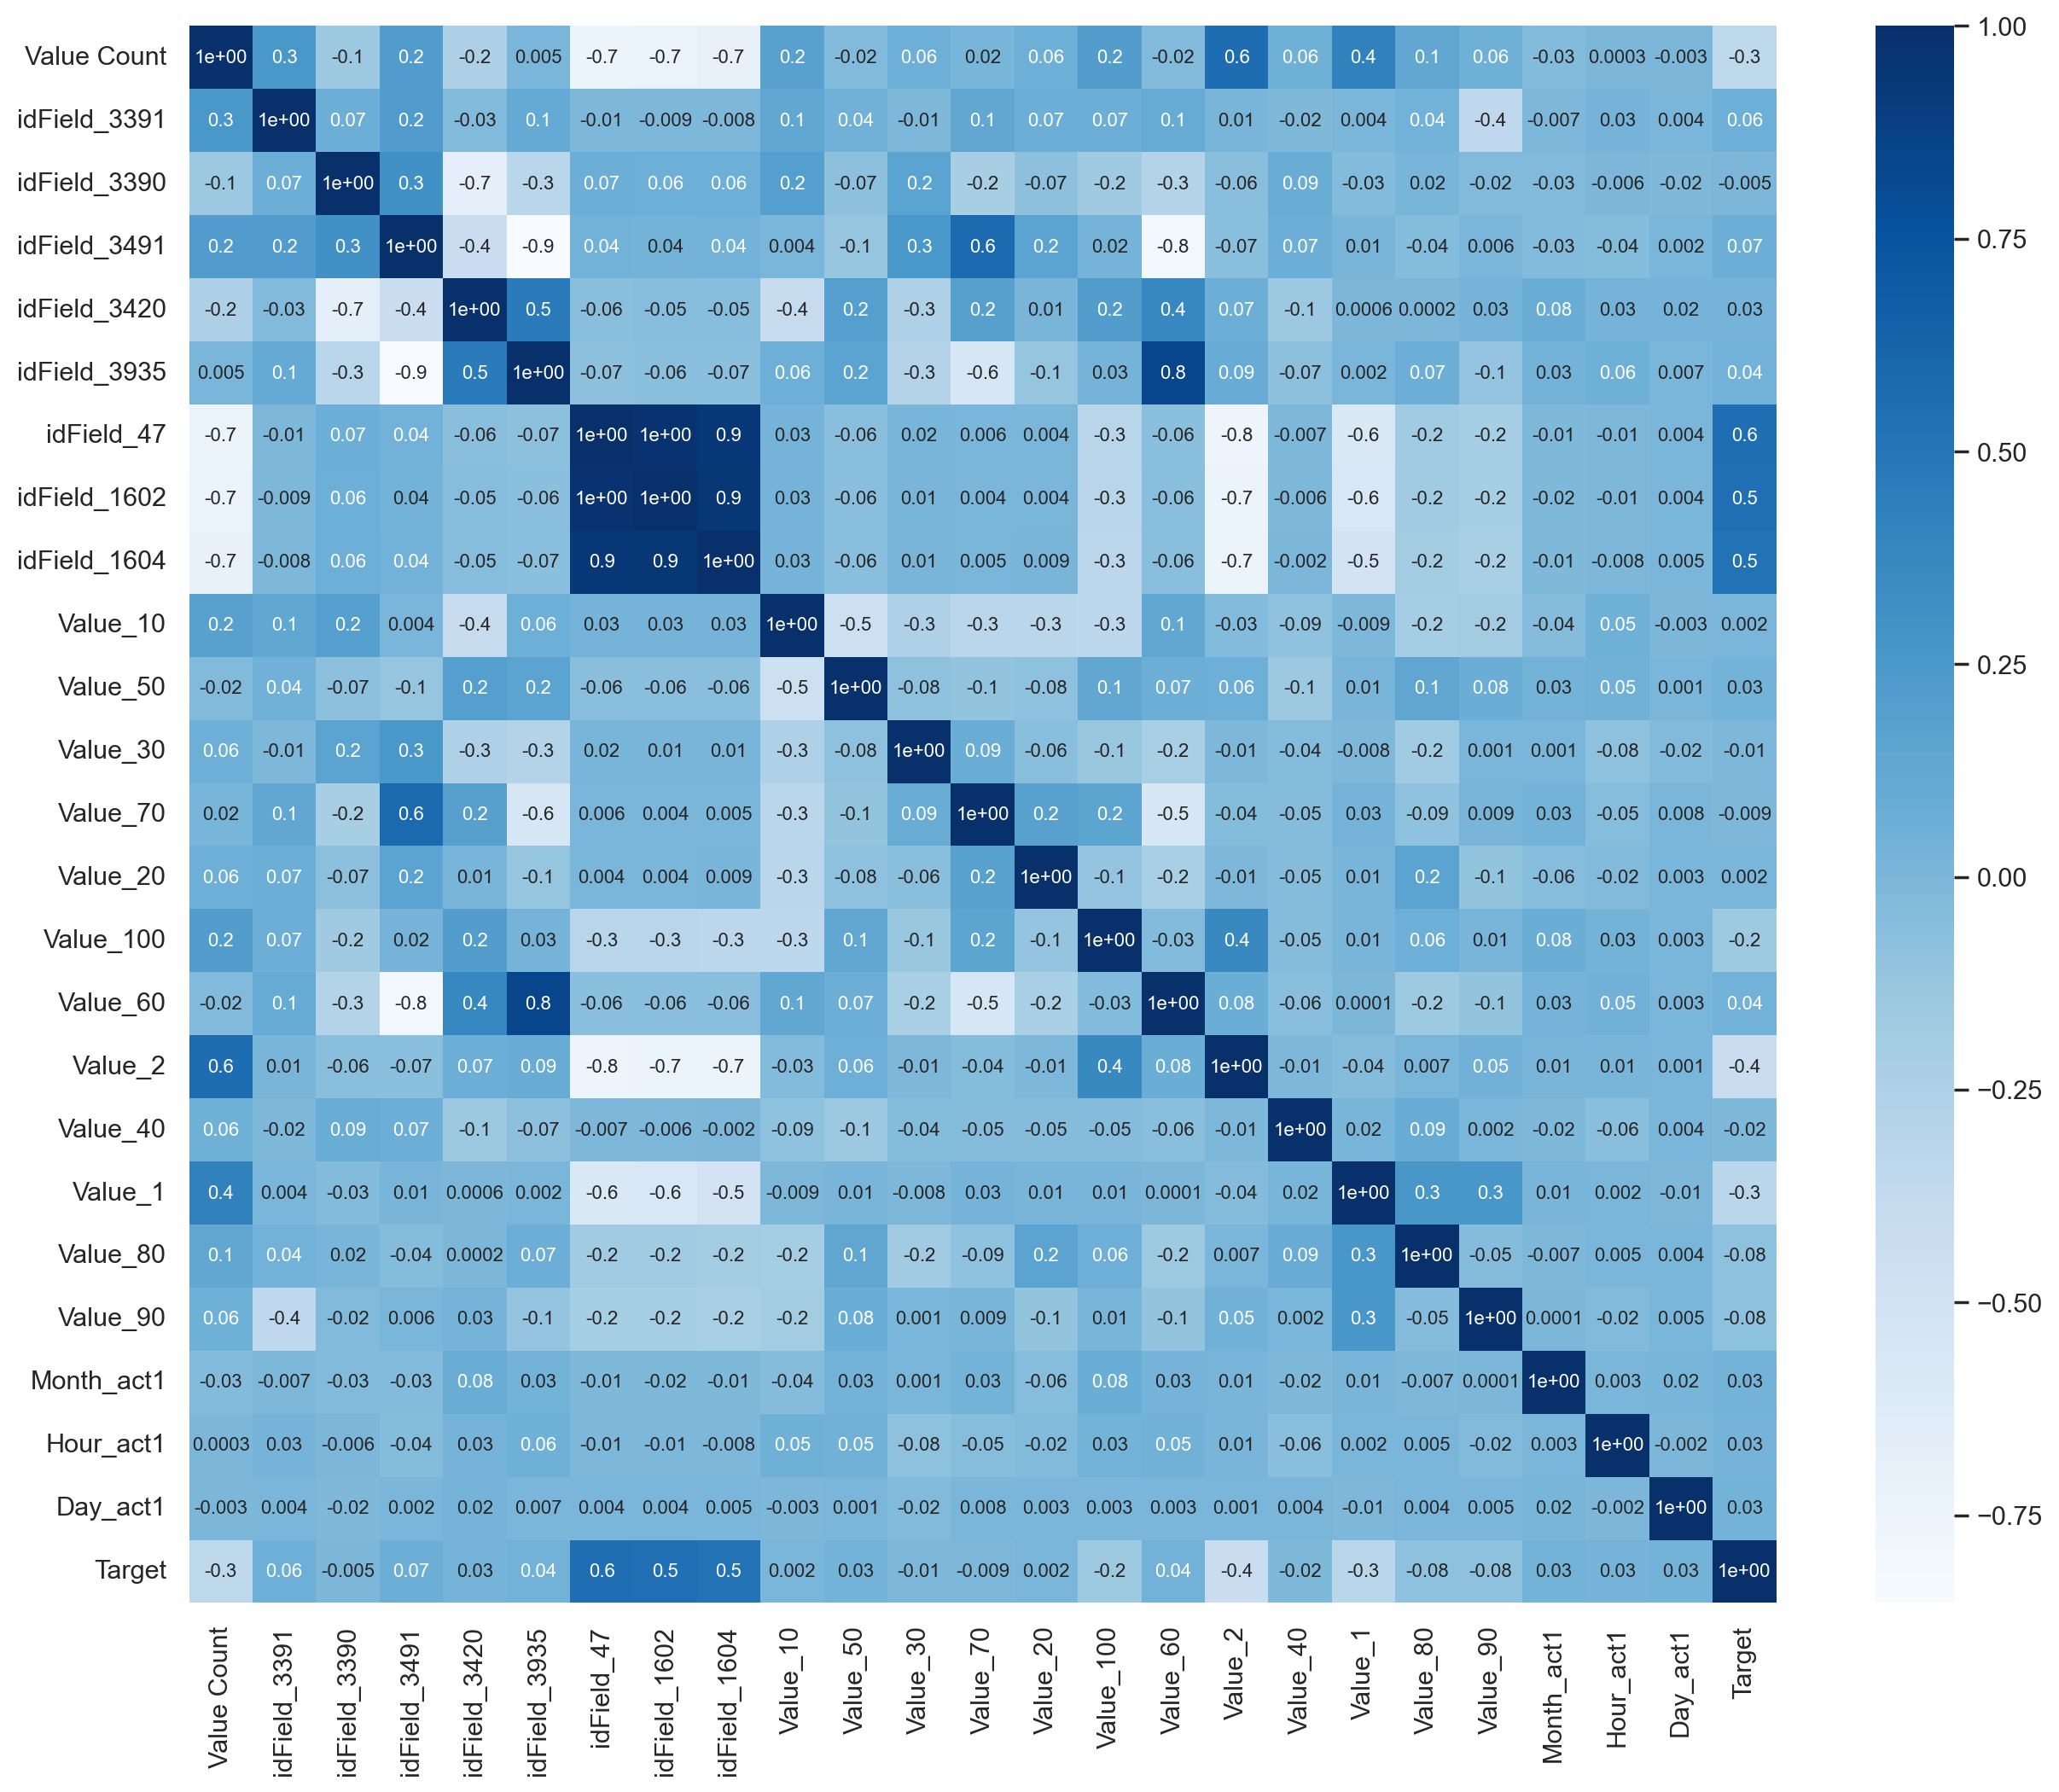

In [91]:
def cor_heatmap(cor):
    plt.figure(figsize=(15,12))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1', annot_kws = {"size": 8})
    plt.show()

# Check Spearman Correlation
correlation_features = pd.concat([X_smote, y_smote], axis=1)
cor_spearman = correlation_features.corr(method ='spearman')

cor_heatmap(cor_spearman)

In [92]:
#Get correlation matrix for features only (excluding the Target)
feature_corr = cor_spearman.loc[X_smote.columns, X_smote.columns]

#List to keep track of features to eliminate
spearman_eliminate = []

#Iterate over each column and find highly correlated pairs
for i in range(len(feature_corr.columns)):
    for j in range(i):
        if abs(feature_corr.iloc[i, j]) > 0.8:  # Check high correlation
            col_i = feature_corr.columns[i]
            col_j = feature_corr.columns[j]
            target_corr_i = abs(cor_spearman.loc[col_i, 'Target'])
            target_corr_j = abs(cor_spearman.loc[col_j, 'Target'])
            #Eliminate the feature with lower correlation to the target
            if target_corr_i < target_corr_j:
                spearman_eliminate.append(col_i)
            else:
                spearman_eliminate.append(col_j)

#Remove duplicates from the elimination list
spearman_eliminate = list(set(spearman_eliminate))

#Eliminate features with low correlation to the target variable
for col in X_smote.columns:
    if abs(cor_spearman.loc[col, 'Target']) < 0.05:
        spearman_eliminate.append(col)

#Remove duplicates again in case some features are added twice
spearman_eliminate = list(set(spearman_eliminate))

#list of features to eliminate
print("Features to eliminate:", spearman_eliminate)

# Remaining features after elimination
remaining_features = [col for col in X_smote.columns if col not in spearman_eliminate]
print("Remaining features:", remaining_features)

Features to eliminate: ['idField_3935', 'Month_act1', 'Day_act1', 'Value_30', 'idField_1602', 'Value_20', 'idField_3390', 'Value_70', 'Value_60', 'Value_40', 'Value_50', 'Value_10', 'idField_1604', 'idField_3420', 'Hour_act1']
Remaining features: ['Value Count', 'idField_3391', 'idField_3491', 'idField_47', 'Value_100', 'Value_2', 'Value_1', 'Value_80', 'Value_90']


### RFE 

We are going to use RFE to identify the most important features for our model. The process involves recursively training the model with subsets of features, removing the least important features at each iteration until the desired number of features is reached (based on the model's performance, using f1-score on the validation dataset)

In [89]:
nof_list = np.arange(2, len(X_train.columns) + 1)
high_score = 0
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(random_state = 42)

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])

    X_train_rfe = rfe.fit_transform(X_smote, y_smote)
    X_val_rfe = rfe.transform(X_val)

    model.fit(X_train_rfe, y_smote)

    #Storing results on training data
    train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_smote, train_pred, average='weighted')
    train_score_list.append(train_score)

    #Storing results on validation data
    val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val, val_pred, average='weighted')
    val_score_list.append(val_score)

    #Check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 32
Score with 32 features: 0.636073


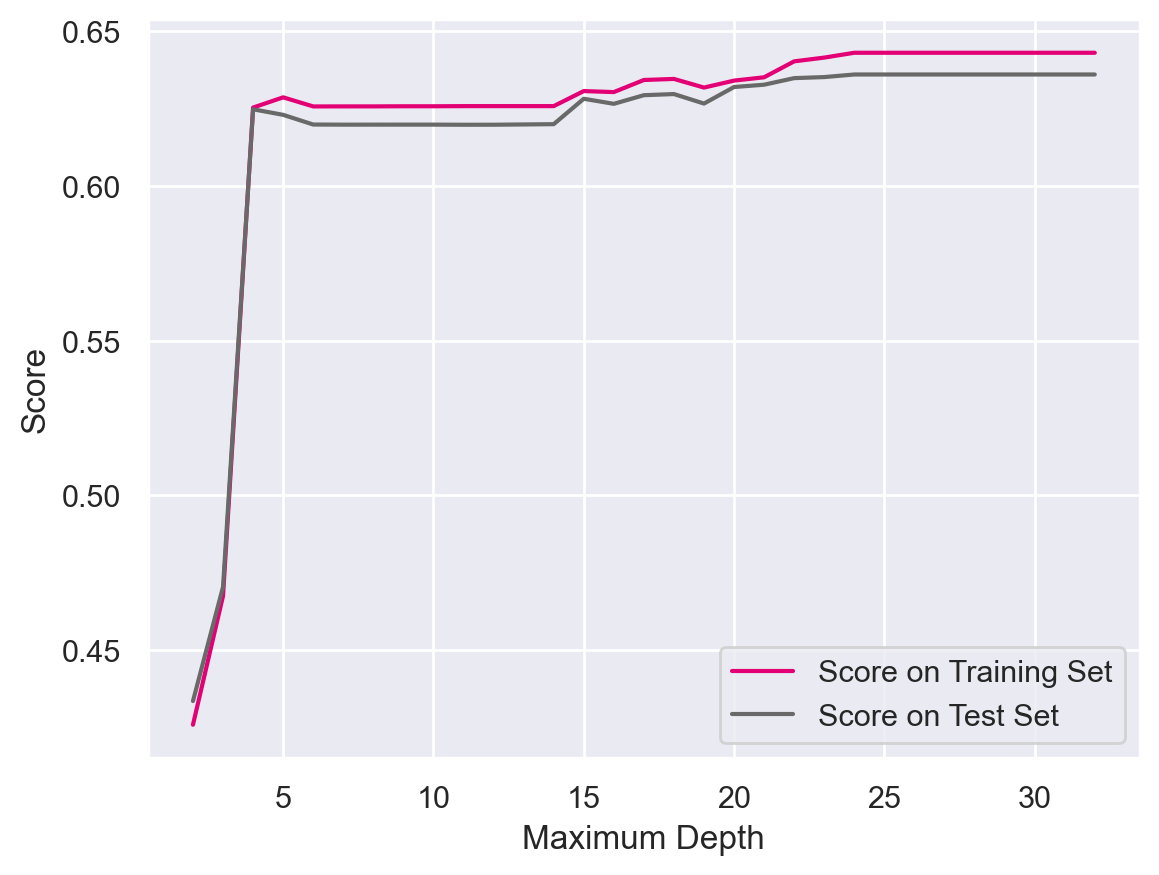

In [90]:
plt.plot(list(range(2, len(X_train.columns) + 1)), train_score_list, label = "Score on Training Set", color = "#E20074")
plt.plot(list(range(2, len(X_train.columns) + 1)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

We have chosen 5 features since we are trying to maxime the f1-score on the validation set and minimize the difference in the score of the val to the train set (minimize overfitting)

In [93]:
#Fitting the model again, but now with the desired number of features 
model = LogisticRegression(random_state=42)
rfe = RFE(estimator = model, n_features_to_select = 5)

X_rfe = rfe.fit_transform(X_smote, y_smote)

In [94]:
#Evaluate what columns should we keep based on RFE
pd.Series(rfe.support_, index = X_smote.columns)

Value Count     False
idField_3391     True
idField_3390    False
idField_3491     True
idField_3420    False
idField_3935     True
idField_47       True
idField_1602    False
idField_1604    False
Value_10        False
Value_50        False
Value_30        False
Value_70        False
Value_20        False
Value_100       False
Value_60        False
Value_2         False
Value_40        False
Value_1         False
Value_80        False
Value_90         True
Month_act1      False
Hour_act1       False
Day_act1        False
dtype: bool

In [95]:
#List with features to eliminate
rfe_eliminate = []
rfe_dataset = pd.Series(rfe.support_, index = X_smote.columns)

for index, value in rfe_dataset.items():
    if not value:
        rfe_eliminate.append(index)

In [96]:
rfe_eliminate

['Value Count',
 'idField_3390',
 'idField_3420',
 'idField_1602',
 'idField_1604',
 'Value_10',
 'Value_50',
 'Value_30',
 'Value_70',
 'Value_20',
 'Value_100',
 'Value_60',
 'Value_2',
 'Value_40',
 'Value_1',
 'Value_80',
 'Month_act1',
 'Hour_act1',
 'Day_act1']

### Lasso

Lasso helps us pick the most important features for our model. It squeezes out less useful features by making their effects smaller, while keeping the important ones.

In [97]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [98]:
reg = LassoCV()
reg.fit(X_smote, y_smote)

coef = pd.Series(reg.coef_, index = X_smote.columns).round(6)
coef

Value Count    -0.000000
idField_3391   -0.602870
idField_3390   -0.051775
idField_3491    1.465505
idField_3420    0.076212
idField_3935    0.971844
idField_47      1.198143
idField_1602   -0.000000
idField_1604    0.128577
Value_10       -0.004033
Value_50        0.077005
Value_30        0.029828
Value_70       -0.268129
Value_20        0.074789
Value_100      -0.002637
Value_60        0.943803
Value_2        -0.000000
Value_40       -0.041309
Value_1        -0.138303
Value_80        0.410778
Value_90        0.561049
Month_act1      0.105493
Hour_act1       0.195865
Day_act1        0.064947
dtype: float64

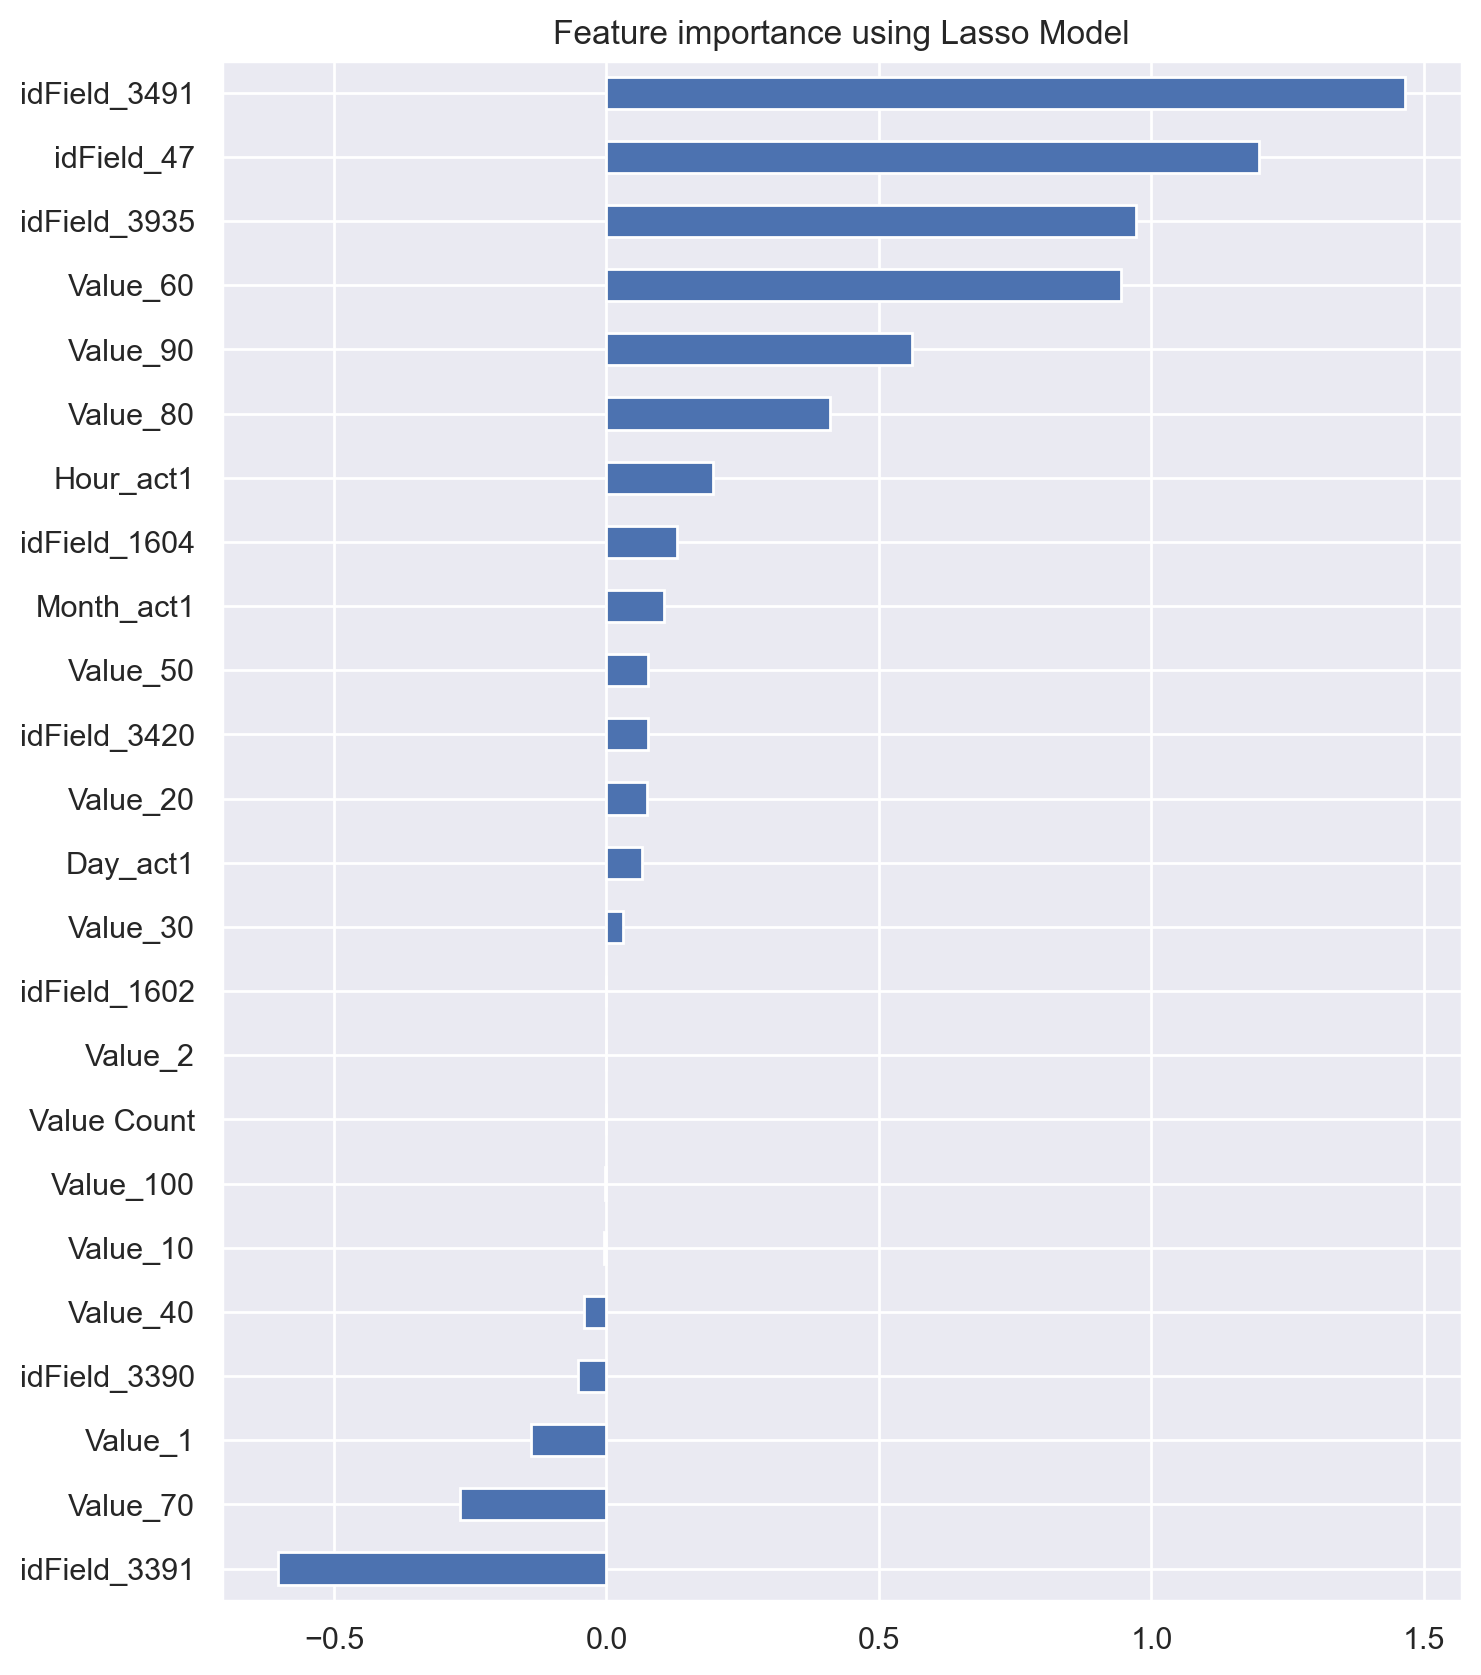

In [99]:
#Feature importance for the model prediction
plot_importance(coef,'Lasso')

In [100]:
#Variables to eliminate using Lasso 
selected_variables = (coef >= -0.06) & (coef <= 0.06)
lasso_eliminate = coef.index[selected_variables].tolist()

print("Variables to eliminate with Lasso:", lasso_eliminate)

Variables to eliminate with Lasso: ['Value Count', 'idField_3390', 'idField_1602', 'Value_10', 'Value_30', 'Value_100', 'Value_2', 'Value_40']


### Decision Tree

Decision Trees work by recursively splitting the data based our features, aiming to create clear and interpretable rules that capture the patterns in our dataset. The feature importances obtained from a Decision Tree tell us how much each feature contributes to the decision-making process.

Value Count: 0.054
idField_3391: 0.0
idField_3390: 0.003
idField_3491: 0.011
idField_3420: 0.017
idField_3935: 0.009
idField_47: 0.257
idField_1602: 0.0
idField_1604: 0.0
Value_10: 0.054
Value_50: 0.033
Value_30: 0.03
Value_70: 0.016
Value_20: 0.037
Value_100: 0.02
Value_60: 0.01
Value_2: 0.0
Value_40: 0.016
Value_1: 0.0
Value_80: 0.009
Value_90: 0.029
Month_act1: 0.084
Hour_act1: 0.139
Day_act1: 0.171


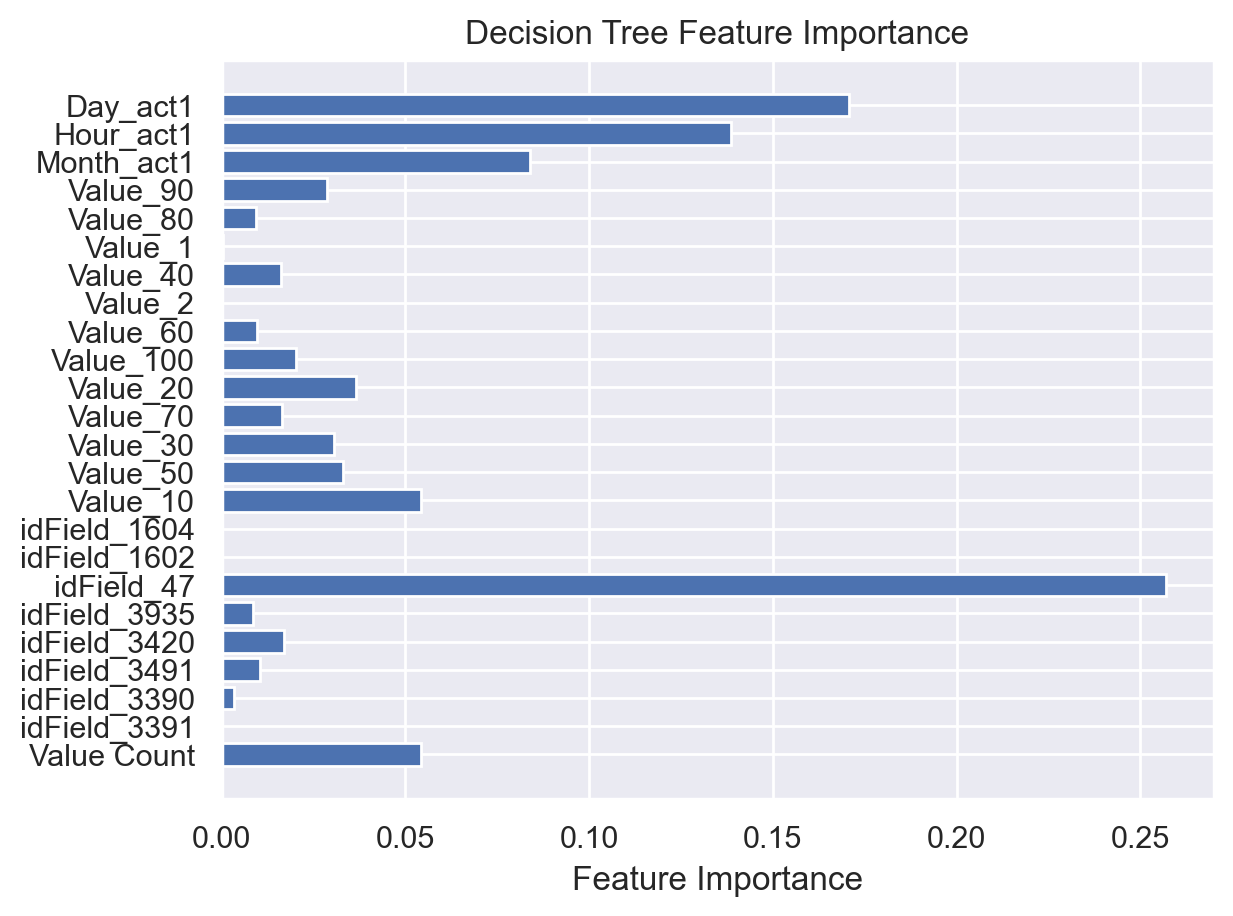

In [101]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_smote, y_smote)

#Get feature importances
feature_importances = clf.feature_importances_

decision_tree_eliminate = []

#Print feature importances
for feature, importance in zip(X_smote.columns, feature_importances):
    print(f"{feature}: {importance.round(3)}")
    if importance < 0.02:
        decision_tree_eliminate.append(feature)

plt.barh(X_smote.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

In [102]:
#List with features to eliminate 
decision_tree_eliminate

['idField_3391',
 'idField_3390',
 'idField_3491',
 'idField_3420',
 'idField_3935',
 'idField_1602',
 'idField_1604',
 'Value_70',
 'Value_60',
 'Value_2',
 'Value_40',
 'Value_1',
 'Value_80']

<a class="anchor" id="selectfin">

#### Final Feature Selection
###### [Go back to Contents](#top)
</a>

Finally, we developed a votting system. If the variable was eliminated for at least 3 of the methods used, then we will drop it.

In [103]:
# Combine all the lists into one list
all_eliminate = (
    rfe_eliminate
    + spearman_eliminate
    + lasso_eliminate
    + decision_tree_eliminate)

element_counts = Counter(all_eliminate)

#Minimum number of lists an element should appear in to drop it
min_appearances = 3

common_elements = [element for element, count in element_counts.items() if count >= min_appearances]
print(common_elements)

['idField_3390', 'idField_3420', 'idField_1602', 'idField_1604', 'Value_10', 'Value_30', 'Value_70', 'Value_60', 'Value_2', 'Value_40']


In [104]:
#Droping the variables in all necessary dataframes
X_train.drop(common_elements, axis=1, inplace=True)
X_val.drop(common_elements, axis=1, inplace=True)
X_smote.drop(common_elements, axis=1, inplace=True)

In [105]:
#Checking how many columns were left 
len(X_smote.columns)

14

In [106]:
#Which columns were left 
X_smote.columns

Index(['Value Count', 'idField_3391', 'idField_3491', 'idField_3935',
       'idField_47', 'Value_50', 'Value_20', 'Value_100', 'Value_1',
       'Value_80', 'Value_90', 'Month_act1', 'Hour_act1', 'Day_act1'],
      dtype='object')

<a class="anchor" id="base">

#### Baseline Modeling
###### [Go back to Contents](#top)
</a>

Now, we reached the modelling phase. Firstly we are going to see the results on our train set with 2 simple and not yet tunned models.

In [141]:
#Multiclass scoring metric
scoring_metric = make_scorer(f1_score, average='weighted')

#List of classifiers
clf_list = [('Gaussian Naive Bayes', GaussianNB()),
            ('Logistic Regression', LogisticRegression(random_state=42))]

cv_base_mean, cv_std = [], []
for clf in clf_list:

    cv = cross_val_score(estimator=clf[1],
                         X=X_smote,
                         y=y_smote,
                         scoring=scoring_metric,
                         cv=5,
                         n_jobs=-1)

    cv_base_mean.append(cv.mean())
    cv_std.append(cv.std())

print('Baseline Models (Weighted Recall):')

for i in range(len(clf_list)):
    print('   {}: {}'.format(clf_list[i][0], np.round(cv_base_mean[i], 2)))

Baseline Models (Weighted Recall):
   Gaussian Naive Bayes: 0.5
   Logistic Regression: 0.63


<a class="anchor" id="tun">

#### Model Tunning
###### [Go back to Contents](#top)
</a>

To find the best parameters for the Models we are going to use Random Search. Unlike GridSearch, instead of systematically checking every possible combination, it randomly selects configurations to try out sees the model performance wity those parameters. This approach is normally more efficient and less computationally intensive, especially when the search space is large.

### Functions 

In [107]:
#Confusion Matrix and Model Assessment Metrics
def metrics(y_train, pred_train):
    print('___________________________________________________________________________________________________________')
    print('                                                TRAIN                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))

### Logistic Regression

Logistics Regression uses Logistic function to map inputs to probabilities between 0 and 1, making it widely used for its simplicity and interpretability.

In [144]:
#Logistic Regression classifier
lr = LogisticRegression(random_state=42)

#Search Space 
param_distributions = {
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),  # 20 values between 1e-4 and 1e4
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10), # Only useful if penalty is 'elasticnet',
    'class_weight':['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lr_clf = RandomizedSearchCV(estimator=lr,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=100,  # Number of parameter settings sampled
                            n_jobs=-1,
                            random_state=45)

#Fit the RandomizedSearchCV object to the training data
best_lr_clf = lr_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lr_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'l1_ratio': 0.0, 'class_weight': 'balanced', 'C': 0.615848211066026}

Best parameters found by RandomizedSearchCV: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'l1_ratio': 0.0, 'class_weight': 'balanced', 'C': 0.615848211066026}


In [108]:
#Defining the model with the best parameters found
lr_best = LogisticRegression(
    solver='liblinear', 
    penalty='l1', 
    max_iter=200, 
    l1_ratio=0.0, 
    C=0.615848211066026, 
    class_weight='balanced',
    random_state=42
)


#Fit the new Logistic Regression model with the best parameters
lr_fit = lr_best.fit(X_smote, y_smote)
lr_pred_train = lr_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lr_pred_train)

print('f1_train:', f1_score(y_smote, lr_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1051
           1       0.99      0.74      0.85      6249
           2       0.59      0.72      0.65     13739
           3       0.49      0.44      0.46     10475

    accuracy                           0.63     31514
   macro avg       0.76      0.70      0.73     31514
weighted avg       0.65      0.63      0.64     31514

[[ 960    1   28   62]
 [   3 4619  896  731]
 [   8    8 9830 3893]
 [  12   50 5846 4567]]
f1_train: 0.64


### SVC

SVC aims to find the best hyperplane separating classes of the target variable. By maximizing the margin between classes, it handles linear and non-linear data using kernel functions.

In [154]:
#Define the SVC classifier
svc = SVC(probability=True, random_state=42)

#Define the expanded parameter grid (Search Space)
param_distributions = {
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  
    'C': np.logspace(-2, 2, 5),  
    'class_weight':['balanced']
}

#Sscoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
svc_clf = RandomizedSearchCV(estimator=svc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=3,
                             verbose=False,
                             n_iter=3,  # Number of parameter settings sampled, can be adjusted to avoid slowing down too much
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_svc_clf = svc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_svc_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 10.0}

Best parameters found by RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 10.0}


In [109]:
#Defining the model with the best parameters found
svc_best = SVC(kernel='rbf',
               gamma= 'scale',
               C= 10.0,
               probability=True,
               class_weight='balanced',
               random_state=42)

#Fit the new Logistic Regression model with the best parameters
svc_fit = svc_best.fit(X_smote, y_smote)
svc_pred_train = svc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, svc_pred_train)

print('f1_train:', f1_score(y_smote, svc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1051
           1       0.99      0.74      0.85      6249
           2       0.60      0.74      0.66     13739
           3       0.51      0.43      0.47     10475

    accuracy                           0.64     31514
   macro avg       0.75      0.71      0.72     31514
weighted avg       0.66      0.64      0.64     31514

[[  977     0    33    41]
 [   22  4621   921   685]
 [   10     8 10154  3567]
 [   93    49  5806  4527]]
f1_train: 0.64


### Random Forest 

In [146]:
#Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': np.arange(5, 21, 5),
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'class_weight':['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
rf_clf = RandomizedSearchCV(estimator=rf,
                            param_distributions=param_distributions,
                            scoring=scoring_metric,
                            cv=5,
                            verbose=False,
                            n_iter=35,  # Number of parameter settings sampled
                            n_jobs=-1,
                            random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_rf_clf = rf_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_rf_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3,
#                                              'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Best parameters found by RandomizedSearchCV: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}


In [110]:
#Define the best Random Forest model
rf_best = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=10,
    min_samples_leaf=3, 
    max_features='sqrt', 
    max_depth=15, 
    criterion='gini', 
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)


#Fit the new Random Forest model with the best parameters
rf_fit = rf_best.fit(X_smote, y_smote)
rf_pred_train = rf_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, rf_pred_train)

print('f1_train:', f1_score(y_smote, rf_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1051
           1       0.99      0.74      0.85      6249
           2       0.69      0.79      0.74     13739
           3       0.63      0.60      0.61     10475

    accuracy                           0.72     31514
   macro avg       0.82      0.77      0.79     31514
weighted avg       0.74      0.72      0.72     31514

[[  998     1    20    32]
 [    6  4641   773   829]
 [    8     9 10909  2813]
 [   19    52  4168  6236]]
f1_train: 0.72


### Gradient Boost

Gradient Boosting builds models sequentially. Each new model corrects the errors of the previous ones, combining them for better accuracy. At the end, for classification tasks it uses weighted voting to determine the final class label of the target variable.

In [147]:
#Define the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=15)

#Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 300, 600, 1000],
    'subsample': [0.66, 0.75, 0.85, 1.0],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],  # default=3
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'n_iter_no_change': [10, 20, 30],
    'validation_fraction': [0.1, 0.2, 0.3],
    'tol': [0.0001, 0.001, 0.01]
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
gbc_clf = RandomizedSearchCV(estimator=gbc,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=35,  # Number of parameter settings sampled
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_gbc_clf = gbc_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_gbc_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.1, 'tol': 0.0001, 'subsample': 0.66, 'n_iter_no_change': 30, 'n_estimators': 1000, 'min_samples_split': 5,
#'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}

Best parameters found by RandomizedSearchCV: {'validation_fraction': 0.1, 'tol': 0.0001, 'subsample': 0.66, 'n_iter_no_change': 30, 'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}


In [111]:
#Model with the best parameters
gbc_best = GradientBoostingClassifier(
    validation_fraction=0.1,
    tol=0.0001,
    subsample=0.66,
    n_iter_no_change=30,
    n_estimators=1000,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)


#Fit the new Gradient Boosting Classifier model with the best parameters
gbc_fit=gbc_best.fit(X_smote, y_smote)
gbc_pred_train = gbc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, gbc_pred_train)

#Print F1 score for the training set
print('f1_train:', f1_score(y_smote, gbc_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1051
           1       0.99      0.75      0.85      6249
           2       0.63      0.88      0.74     13739
           3       0.66      0.42      0.51     10475

    accuracy                           0.70     31514
   macro avg       0.82      0.74      0.77     31514
weighted avg       0.72      0.70      0.69     31514

[[  982     0    27    42]
 [    0  4662   928   659]
 [    3     6 12147  1583]
 [    0    42  6082  4351]]
f1_train: 0.69


### XGBOOST

XGBOOST is an advanced implementation of gradient boosting designed for speed and performance. It builds models sequentially, with each new model correcting the errors of the previous ones.

In [148]:
#Define the XGBoost classifier
xgb = XGBClassifier(random_state=42)

#Define the expanded parameter grid
param_distributions = {
    'n_estimators': np.arange(50, 301, 50),
    'learning_rate': np.logspace(-3, 0, 10),  # Values between 0.001 and 1
    'max_depth': np.arange(3, 11),
    'reg_alpha': np.linspace(0, 1, 10),
    'reg_lambda': np.linspace(0, 1, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 1, 10),
    'min_child_weight': np.arange(1, 11)
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
xgb_clf = RandomizedSearchCV(estimator=xgb,
                             param_distributions=param_distributions,
                             scoring=scoring_metric,
                             cv=5,
                             verbose=False,
                             n_iter=35,  # Number of parameter settings sampled
                             n_jobs=-1,
                             random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_xgb_clf = xgb_clf.fit(X_smote, y_smote)

#Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_xgb_clf.best_params_)
#Best parameters found by RandomizedSearchCV: {'subsample': 0.6, 'reg_lambda': 0.2222222222222222, 'reg_alpha': 0.6666666666666666, 
                                              #'n_estimators': 300, 'min_child_weight': 6, 'max_depth': 8, 'learning_rate': 0.046415888336127774, 'gamma': 0.1111111111111111, 'colsample_bytree': 0.5}

Best parameters found by RandomizedSearchCV: {'subsample': 0.6, 'reg_lambda': 0.2222222222222222, 'reg_alpha': 0.6666666666666666, 'n_estimators': 300, 'min_child_weight': 6, 'max_depth': 8, 'learning_rate': 0.046415888336127774, 'gamma': 0.1111111111111111, 'colsample_bytree': 0.5}


In [112]:
#Model with the best parameters
xgb_best = XGBClassifier(
    subsample=0.6,
    reg_lambda=0.2222222222222222,
    reg_alpha=0.6666666666666666,
    n_estimators=300,
    min_child_weight=6,
    max_depth=8,
    learning_rate=0.046415888336127774,
    gamma=0.1111111111111111,
    colsample_bytree=0.5,
    random_state=42
)


#Fit the new XGBoost model with the best parameters
xgb_fit = xgb_best.fit(X_smote, y_smote)
xgb_pred_train = xgb_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, xgb_pred_train)

print('f1_train:', f1_score(y_smote, xgb_pred_train, average='weighted').round(2))

___________________________________________________________________________________________________________
                                                TRAIN                                                      
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1051
           1       0.99      0.74      0.85      6249
           2       0.65      0.91      0.75     13739
           3       0.69      0.43      0.53     10475

    accuracy                           0.72     31514
   macro avg       0.83      0.75      0.77     31514
weighted avg       0.74      0.72      0.71     31514

[[  960     1    31    59]
 [    0  4626   922   701]
 [    7     9 12459  1264]
 [    3    51  5873  4548]]
f1_train: 0.71


### LightGBM

LightGBM is a fast, high-performance implementation of gradient boosting. It builds models sequentially, optimizing for speed and memory efficiency by using a histogram-based method in which data is bucketed into bins using a histogram of the distributions. In classification, it uses weighted voting to determine the final class label.

In [149]:
#Define the LGBMClassifier
lgbmc = LGBMClassifier(random_state=42)

#Define the parameter grid
param_distributions = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5],
    'class_weight':['balanced']
}

#Scoring metric as F1 score
scoring_metric = make_scorer(f1_score, average='weighted')

#Create RandomizedSearchCV object
lgbmc_clf = RandomizedSearchCV(estimator=lgbmc,
                               param_distributions=param_distributions,
                               scoring=scoring_metric,
                               cv=5,
                               verbose=False,
                               n_iter=35,  
                               n_jobs=-1,
                               random_state=42)

#Fit the RandomizedSearchCV object to the training data
best_lgbmc_clf = lgbmc_clf.fit(X_smote, y_smote)

# Print the best parameters
print("Best parameters found by RandomizedSearchCV:", best_lgbmc_clf.best_params_)
#BBest parameters found by RandomizedSearchCV: {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 10, 'n_estimators': 200, 'min_child_samples': 10, 
#'max_depth': 5, 'learning_rate': 0.01, 'feature_fraction': 0.5, 'class_weight': 'balanced'}

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 31514, number of used features: 14
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [113]:
#Model with the best parameters
lgbmc_best = LGBMClassifier(
    reg_lambda=0.1,
    reg_alpha=0.1,
    num_leaves=10,
    n_estimators=200,
    min_child_samples=10,
    max_depth=5,
    learning_rate=0.01,
    feature_fraction=0.5,
    class_weight='balanced',
    random_state=42
)


#Fit the new LGBM model with the best parameters
lgbmc_fit = lgbmc_best.fit(X_smote, y_smote)
lgbmc_pred_train = lgbmc_fit.predict(X_smote)

#Assess Model's Performance
metrics(y_smote, lgbmc_pred_train)

print('f1_train:', f1_score(y_smote, lgbmc_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 31514, number of used features: 14
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

### Ensamble

Voting classifiers are ensemble methods that combine multiple different models to improve classification performance. We are using Soft Voting ensemble, where the final class label is determined by the weighted average of predicted probabilities from the models used.

In [114]:
#Define the estimators for the soft voting ensemble
estimators = [
    ('rf', rf_fit),
    ('gb', gbc_fit),
    ('xgb', xgb_fit),
    ('lgbm', lgbmc_fit),
    ('lr', lr_fit),
    ('svc', svc_fit)
]

#Create the soft voting ensemble
soft_voting_clf = VotingClassifier(estimators=estimators, voting='soft')

#Fit the ensemble to the training data
ensemble_model=soft_voting_clf.fit(X_smote, y_smote)

#Predict on the training set
soft_voting_pred_train = ensemble_model.predict(X_smote)

#Assess the ensemble's performance on the training set
metrics(y_smote, soft_voting_pred_train)

print('f1_train:', f1_score(y_smote, soft_voting_pred_train, average='weighted').round(2))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 31514, number of used features: 14
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

<a class="anchor" id="impor">

### Models Feature Importance
###### [Go back to Contents](#top)
</a>

In this section, we will examine the variables that contributed most significantly to predicting the target variable in each model

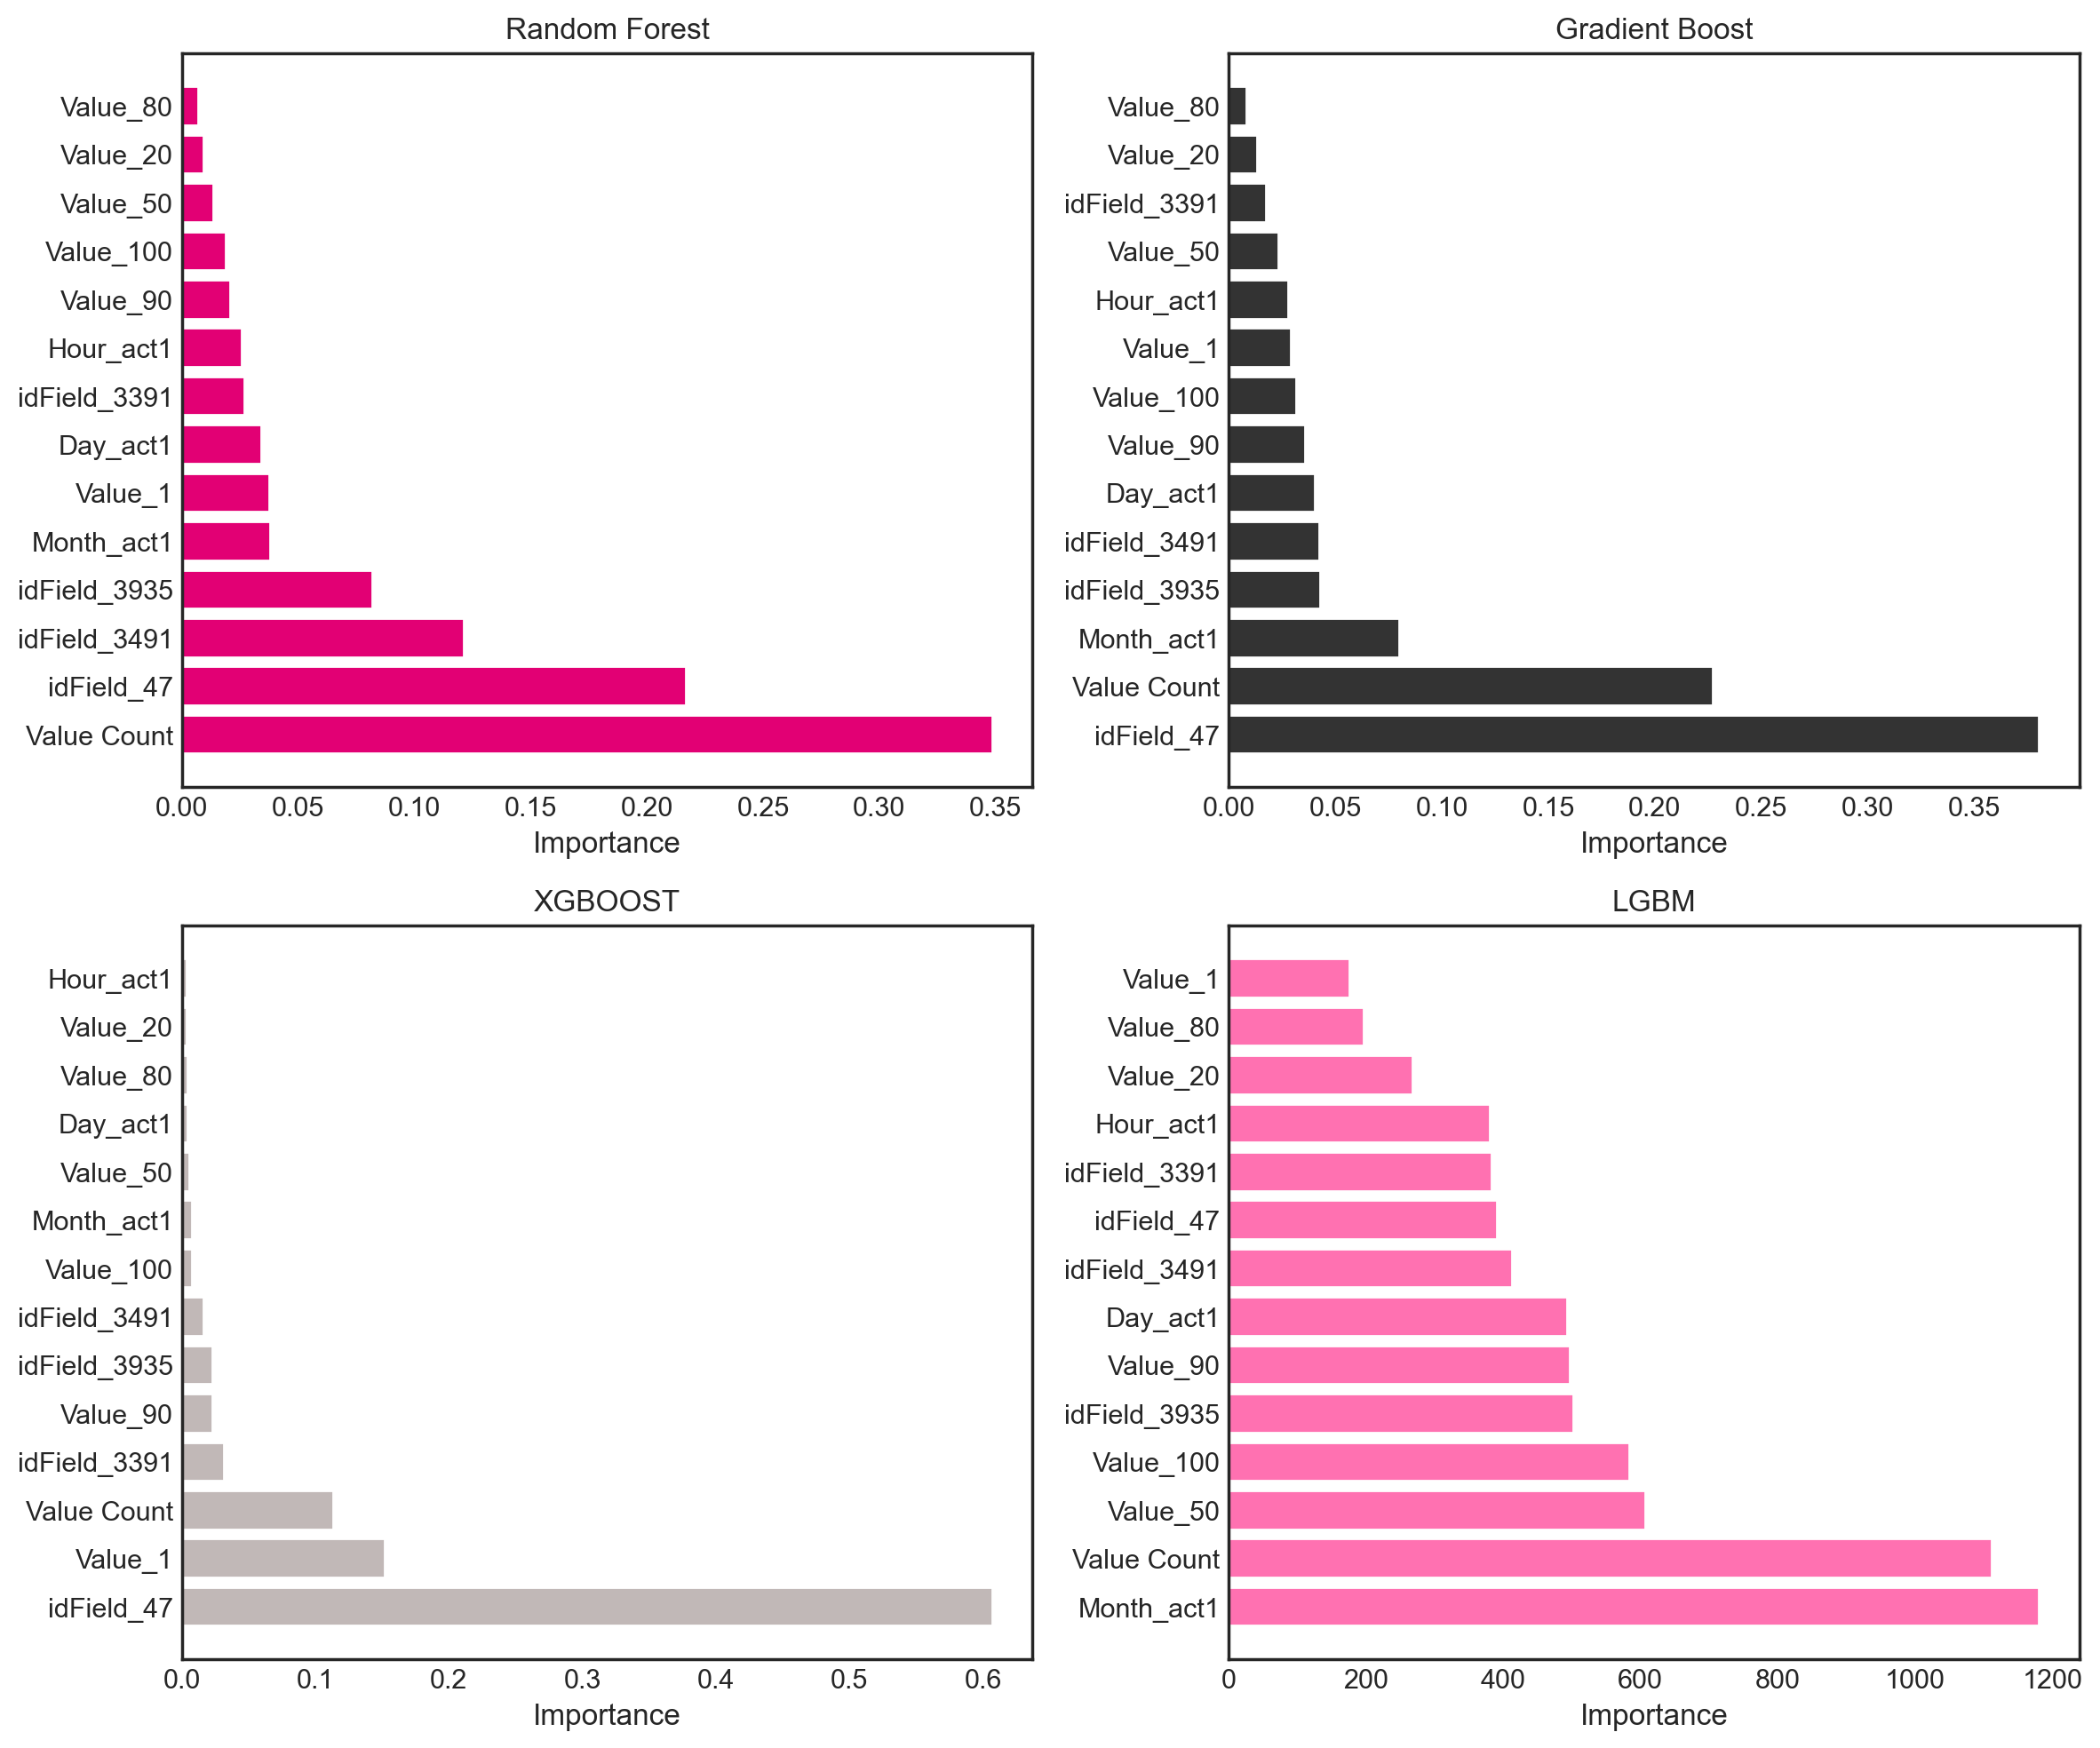

In [115]:
#Set white background
plt.style.use("seaborn-v0_8-white")

#Define the models and their names
models = {
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'XGBOOST': xgb_fit,
    'LGBM': lgbmc_fit
}

#Define custom colors
colors = {"magenta": "#E20074", "dark_gray": "#333333", "light_gray": "#C1B8B7", "pink": "#FF71B1"}

#Assuming X_smote is a DataFrame, get the feature names
feature_names = X_smote.columns if hasattr(X_smote, 'columns') else [f'Feature {i}' for i in range(X_smote.shape[1])]

#Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#Plot feature importance for each model
for ax, (name, model), color in zip(axs.flatten(), models.items(), colors.values()):
    feature_importance = model.feature_importances_
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_feature_names = np.array(feature_names)[sorted_indices]
    
    ax.barh(range(X_smote.shape[1]), feature_importance[sorted_indices], color=color)
    ax.set_yticks(range(X_smote.shape[1]))
    ax.set_yticklabels(sorted_feature_names)
    ax.set_title(name)
    ax.set_xlabel('Importance')

plt.tight_layout()
plt.show()

As we can see the number of diferent values that were inserted in the inicial form is allways in the top 3 of most significant variables to predict the outcome. idFeild_47 is also important to estimate the outcome for the XGBoost, Random Forest and Gradient Boosting models, being in the top 3 for this models as well.

<a class="anchor" id="TRAIN">

### Train Metrics Comparison 

###### [Go back to Contents](#top)
</a>

Here we can compare the diferent models performance on the train dataset using Precision, Recall and F1_score.
- Precision measures the proportion of correctly predicted positive instances (true positives) among all instances predicted as positive (true positives + false positives).
- Recall measures the proportion of correctly predicted positive instances (true positives) among all actual positive instances (true positives + false negatives). It focuses on the ability of the classifier to find all the positive instances.
- The F1 Score provides a single score that balances both precision and recall. It reaches its best value at 1 and worst at 0. It is a useful metric when we want to find a balance between precision and recall, especially when there is an uneven class distribution, that is our projects case.

In [116]:
#Our models definition
models = {
    'Logistic Regression': lr_fit,
    'SVC': svc_fit,
    'Random Forest': rf_fit,
    'Gradient Boost': gbc_fit,
    'LGBM': lgbmc_fit,
    'Ensemble': ensemble_model,
    'XGBOOST': xgb_fit,
}

#Initialize empty lists to store metrics
precision = []
recall = []
f1 = []

#Calculate metrics for each model
for name, model in models.items():
    pred_train = model.predict(X_smote)
    
    precision_score_train = precision_score(y_smote, pred_train, average='weighted')
    recall_score_train = recall_score(y_smote, pred_train, average='weighted')
    f1_score_train = f1_score(y_smote, pred_train, average='weighted')

    precision.append(precision_score_train)
    recall.append(recall_score_train)
    f1.append(f1_score_train)

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({'Model': list(models.keys()),
                           'Weighted Precision': precision,
                           'Weighted Recall': recall,
                           'Weighted F1 Score': f1})

metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


,Model,Weighted Precision,Weighted Recall,Weighted F1 Score
0,Logistic Regression,0.650585,0.633877,0.635530
1,SVC,0.657773,0.643492,0.642787
2,Random Forest,0.736805,0.722980,0.724644
3,Gradient Boost,0.723538,0.702608,0.691632
4,LGBM,0.663615,0.648125,0.650897
5,Ensemble,0.718375,0.699054,0.690081
6,XGBOOST,0.740396,0.716919,0.705755


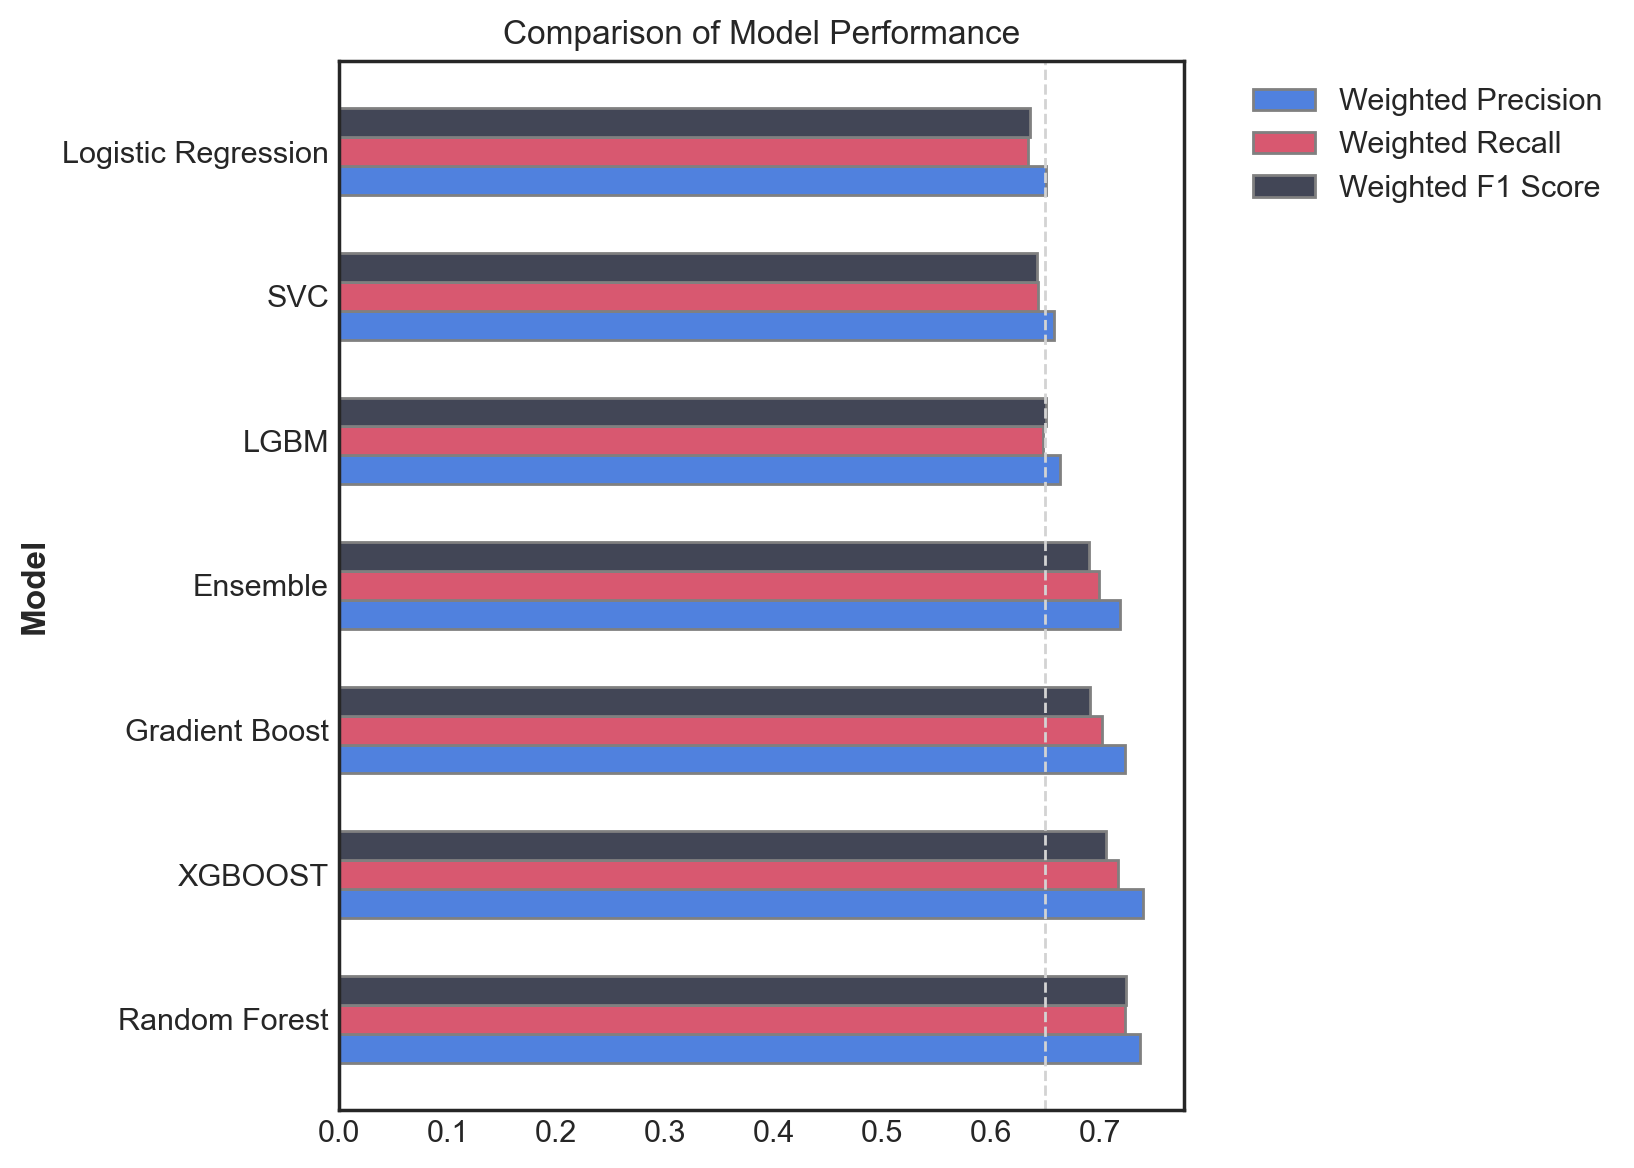

In [117]:
#Sort the DataFrame by 'Weighted F1 Score' in descending order
metrics_df = metrics_df.sort_values(by='Weighted F1 Score', ascending=False)

#Set the width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#Plot the bars horizontally
ax.barh(r1, metrics_df['Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Weighted Precision')
ax.barh(r2, metrics_df['Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Weighted Recall')
ax.barh(r3, metrics_df['Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Weighted F1 Score')

#Add a light grey ticked line at 0.65
ax.axvline(x=0.65, color='lightgrey', linestyle='dashed', linewidth=1)

#Add yticks on the middle of the group bars
ax.set_ylabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(metrics_df))])
ax.set_yticklabels(metrics_df['Model'])

#Add legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot
plt.title('Comparison of Model Performance')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()


<a class="anchor" id="VAL">

### Validation Implementation

###### [Go back to Contents](#top)
</a>

In this section we are going to repeat the process for the validation dataset

In [118]:
#Initialize lists to store metrics for validation set
val_precision = []
val_recall = []
val_f1 = []

#Calculate metrics for each model on validation set
for name, model in models.items():
    pred_val = model.predict(X_val)
    
    precision_val = precision_score(y_val, pred_val, average='weighted')
    recall_val = recall_score(y_val, pred_val, average='weighted')
    f1_val = f1_score(y_val, pred_val, average='weighted')

    val_precision.append(precision_val)
    val_recall.append(recall_val)
    val_f1.append(f1_val)

#Create a DataFrame to store the metrics for validation set
val_metrics_df = pd.DataFrame({'Model': list(models.keys()),
                               'Val Weighted Precision': val_precision,
                               'Val Weighted Recall': val_recall,
                               'Val Weighted F1 Score': val_f1})

#Print the DataFrame
val_metrics_df

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


,Model,Val Weighted Precision,Val Weighted Recall,Val Weighted F1 Score
0,Logistic Regression,0.647869,0.631672,0.632589
1,SVC,0.650760,0.636707,0.635645
2,Random Forest,0.685923,0.670023,0.672654
3,Gradient Boost,0.704635,0.686459,0.674517
4,LGBM,0.663183,0.648034,0.650737
5,Ensemble,0.693279,0.676834,0.667022
6,XGBOOST,0.708317,0.689494,0.677016


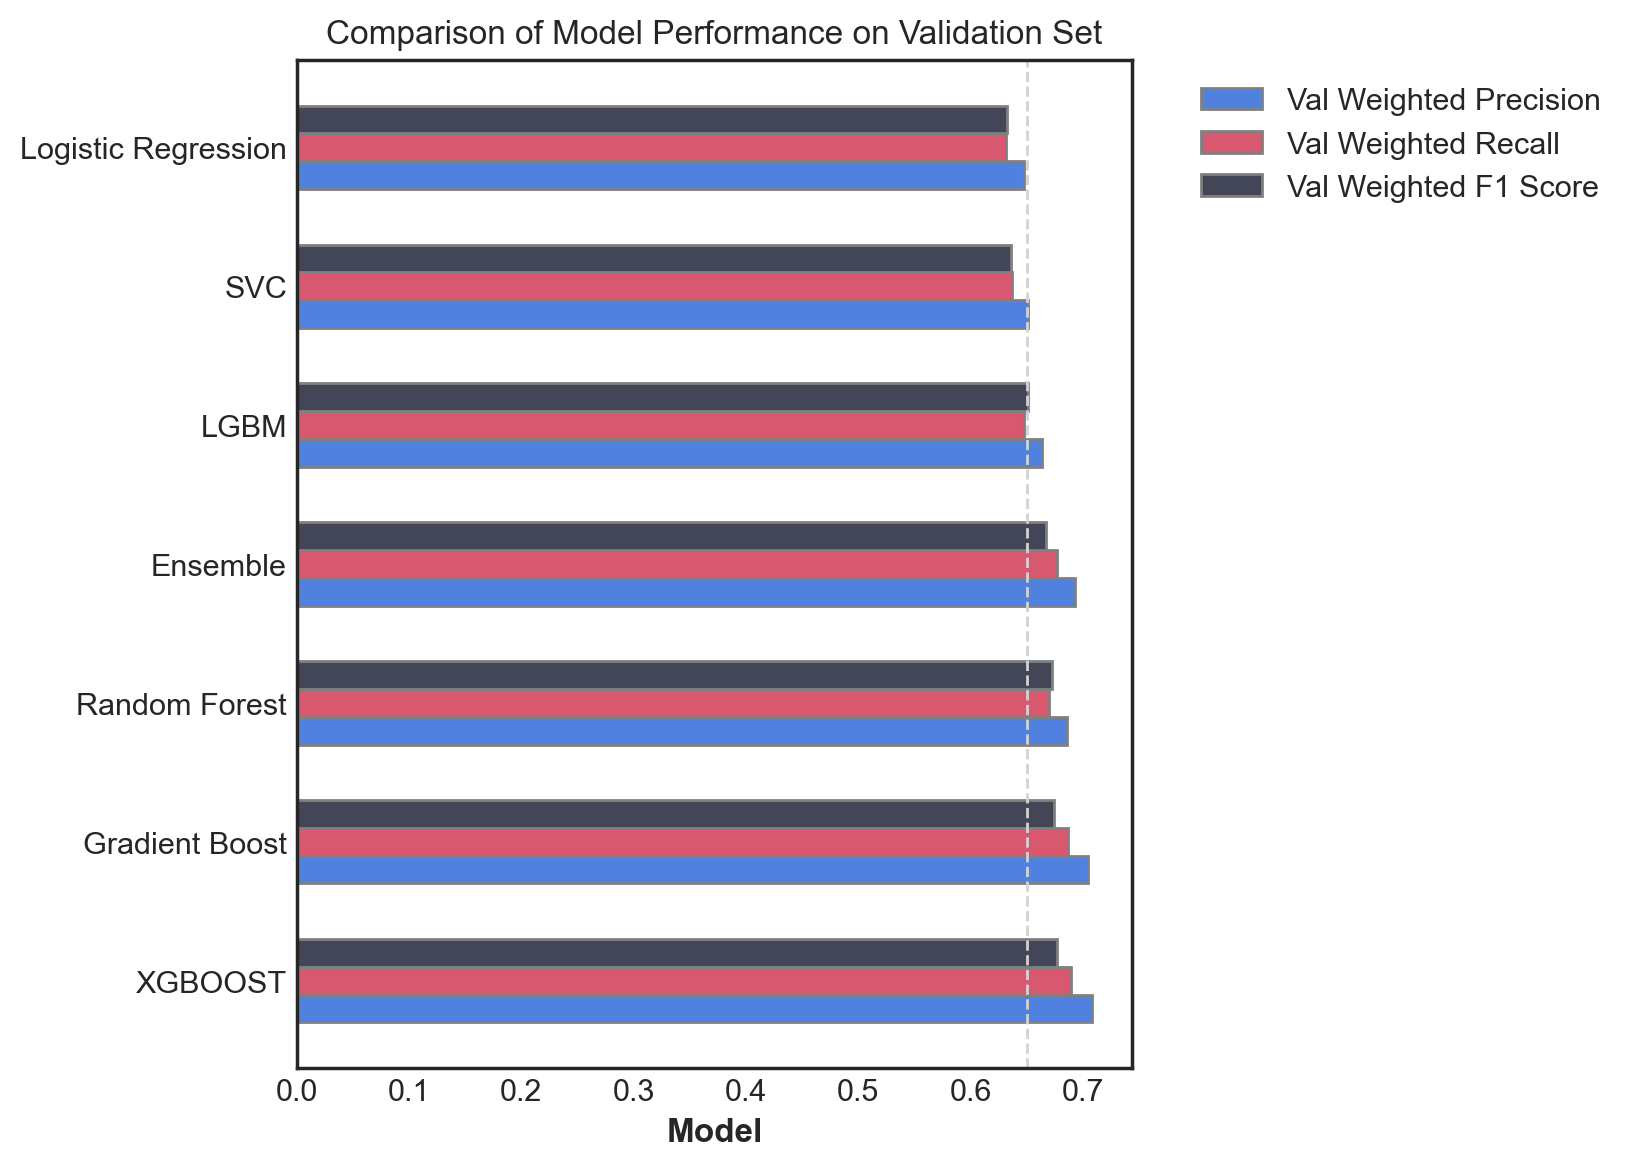

In [119]:
#Sort the DataFrame by 'Val Weighted F1 Score' in descending order
val_metrics_df = val_metrics_df.sort_values(by='Val Weighted F1 Score', ascending=False)

#width of the bars
bar_width = 0.2

#Set the position of the bars on the y-axis
r1 = np.arange(len(val_metrics_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Set up the figure and axis for validation set
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for validation set
ax.barh(r1, val_metrics_df['Val Weighted Precision'], color='#5081DE', height=bar_width, edgecolor='grey', label='Val Weighted Precision')
ax.barh(r2, val_metrics_df['Val Weighted Recall'], color='#D85870', height=bar_width, edgecolor='grey', label='Val Weighted Recall')
ax.barh(r3, val_metrics_df['Val Weighted F1 Score'], color='#424656', height=bar_width, edgecolor='grey', label='Val Weighted F1 Score')

#Add a light grey ticked line at 0.65
ax.axvline(x=0.65, color='lightgrey', linestyle='dashed', linewidth=1)

#Add xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold')
ax.set_yticks([r + bar_width for r in range(len(val_metrics_df))])
ax.set_yticklabels(val_metrics_df['Model'])

#legend
ax.legend()

#Add legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Show the plot for validation set
plt.title('Comparison of Model Performance on Validation Set')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()


<a class="anchor" id="fin">

### Final Model Selection

###### [Go back to Contents](#top)
</a>

We will select the final model based on two criteria: firstly,prioritizing the model with the highest F1 score on the validation set. Secondly, the model with the least amount of overfitting, indicated by the closest F1 score between the training and validation sets, since we want a model that generalizes well on unseen data. We choose F1 score as our primary metric because it effectively evaluates model performance in imbalanced classification problems.

In [120]:
#Calculate the differences between train and validation F1 scores
f1_diff = [abs(train - val) for train, val in zip(f1, val_f1)]

#Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Precision': precision,
    'Train Recall': recall,
    'Train F1 Score': f1,
    'Validation Precision': val_precision,
    'Validation Recall': val_recall,
    'Validation F1 Score': val_f1,
    'F1 Score Difference': f1_diff
})

#Sort the DataFrame by Validation F1 Score (descending) and F1 Score Difference (ascending)
metrics_df.sort_values(by=['Validation F1 Score', 'F1 Score Difference'], ascending=[False, True], inplace=True)

#Select the best model
best_model_name = metrics_df.iloc[0]['Model']
best_model = models[best_model_name]
best_model_metrics = metrics_df.iloc[0]

#Print the best model and its scores
print(f"The best model is {best_model_name}")
print(f"Train F1 Score: {best_model_metrics['Train F1 Score']}")
print(f"Validation F1 Score: {best_model_metrics['Validation F1 Score']}")
print(f"F1 Score Difference: {best_model_metrics['F1 Score Difference']}")

#Display the DataFrame
metrics_df

The best model is XGBOOST
Train F1 Score: 0.7057547546641593
Validation F1 Score: 0.6770162701539799
F1 Score Difference: 0.028738484510179352


,Model,Train Precision,Train Recall,Train F1 Score,Validation Precision,Validation Recall,Validation F1 Score,F1 Score Difference
6,XGBOOST,0.740396,0.716919,0.705755,0.708317,0.689494,0.677016,0.028738
3,Gradient Boost,0.723538,0.702608,0.691632,0.704635,0.686459,0.674517,0.017115
2,Random Forest,0.736805,0.722980,0.724644,0.685923,0.670023,0.672654,0.051990
5,Ensemble,0.718375,0.699054,0.690081,0.693279,0.676834,0.667022,0.023059
4,LGBM,0.663615,0.648125,0.650897,0.663183,0.648034,0.650737,0.000160
1,SVC,0.657773,0.643492,0.642787,0.650760,0.636707,0.635645,0.007142
0,Logistic Regression,0.650585,0.633877,0.635530,0.647869,0.631672,0.632589,0.002941


<a class="anchor" id="int">

### Final Model Interpretation

###### [Go back to Contents](#top)
</a>

We decided to select Gradient Boost as our final model for this stage as it represents the optimal balance between a high f1-score and a lower risk of overfit than XGBBoost.

In [122]:
# Assuming the exact name of the model is 'Gradient Boost'
gradient_boost_model_name = 'Gradient Boost'  # Replace with the exact name if necessary

# Filter the DataFrame for the exact model name
gradient_boost_df = metrics_df[metrics_df['Model'] == gradient_boost_model_name]

# Display the filtered DataFrame
gradient_boost_df

,Model,Train Precision,Train Recall,Train F1 Score,Validation Precision,Validation Recall,Validation F1 Score,F1 Score Difference
3,Gradient Boost,0.723538,0.702608,0.691632,0.704635,0.686459,0.674517,0.017115


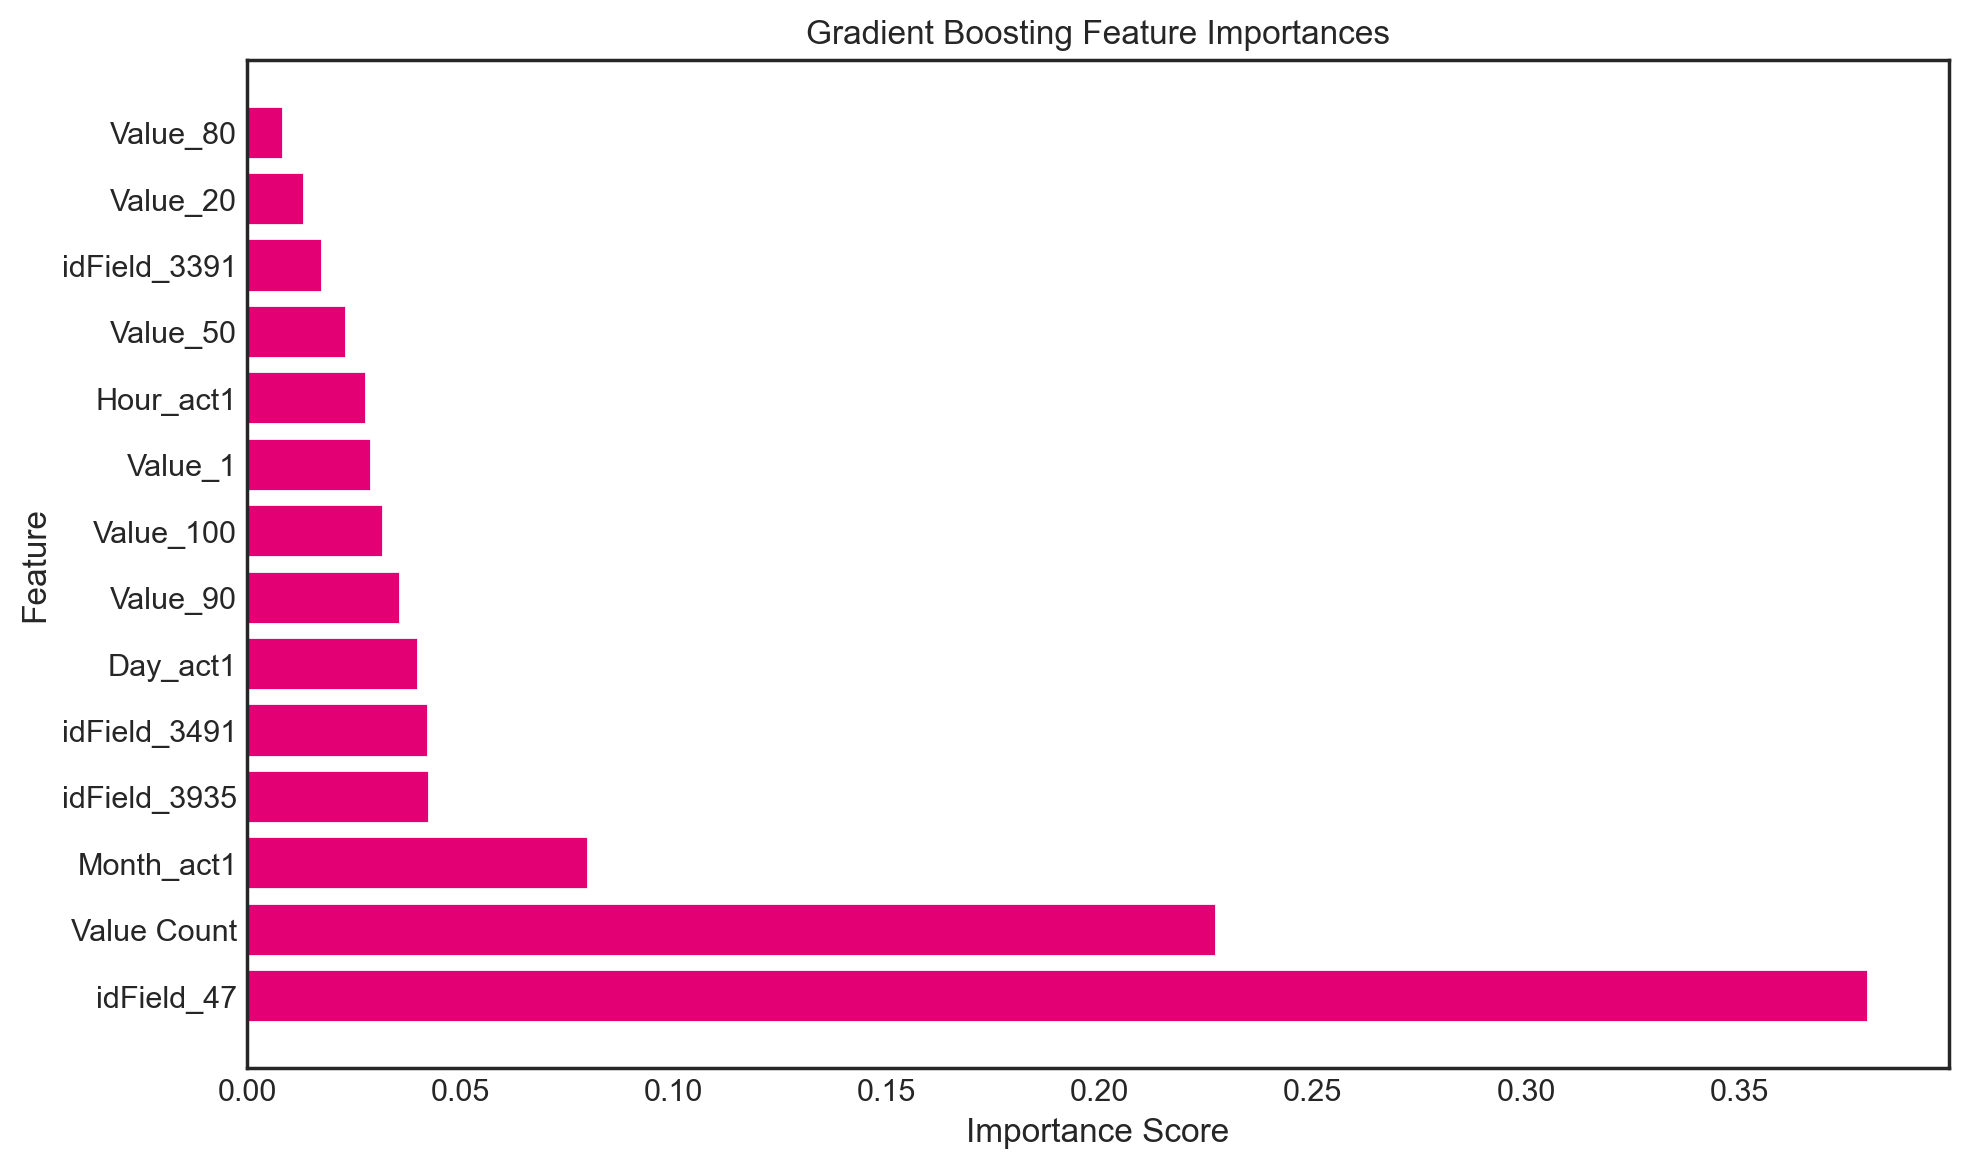

In [124]:
# Extract feature importances
importances = gbc_fit.feature_importances_
features = X_smote.columns

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color="#E20074")
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importances')
plt.tight_layout()
plt.show()

### Key Features:

- idField_47 and Value Count are the most important features, with the highest importance scores. This suggests that these features contribute the most to the predictive power of the Gradient Boosting model.
  
- Month_act1 and idField_3935 also show notable importance, indicating they are significant but less influential compared to the top two features.